## House Price prediction 

In [78]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from sklearn.metrics import r2_score
sns.set()
pd.set_option('max_columns', 1000)
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_csv('Data/train.csv')
df_test=pd.read_csv('Data/test.csv')
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [3]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [4]:
df_train.shape,df_test.shape

((1460, 81), (1459, 80))

In [5]:
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

## Missing Values

In [6]:
#Let's see the number of missing values in every feature for training dataset.
features = df_train.columns
for feature in features:
    print(feature,':',df_train[feature].isnull().mean()*100,'% missing values')

Id : 0.0 % missing values
MSSubClass : 0.0 % missing values
MSZoning : 0.0 % missing values
LotFrontage : 17.73972602739726 % missing values
LotArea : 0.0 % missing values
Street : 0.0 % missing values
Alley : 93.76712328767123 % missing values
LotShape : 0.0 % missing values
LandContour : 0.0 % missing values
Utilities : 0.0 % missing values
LotConfig : 0.0 % missing values
LandSlope : 0.0 % missing values
Neighborhood : 0.0 % missing values
Condition1 : 0.0 % missing values
Condition2 : 0.0 % missing values
BldgType : 0.0 % missing values
HouseStyle : 0.0 % missing values
OverallQual : 0.0 % missing values
OverallCond : 0.0 % missing values
YearBuilt : 0.0 % missing values
YearRemodAdd : 0.0 % missing values
RoofStyle : 0.0 % missing values
RoofMatl : 0.0 % missing values
Exterior1st : 0.0 % missing values
Exterior2nd : 0.0 % missing values
MasVnrType : 0.547945205479452 % missing values
MasVnrArea : 0.547945205479452 % missing values
ExterQual : 0.0 % missing values
ExterCond : 0.0 

In [7]:
#Similarly for the test dataset.
features = df_test.columns
for feature in features:
    print(feature,':',df_test[feature].isnull().mean()*100,'% missing values')

Id : 0.0 % missing values
MSSubClass : 0.0 % missing values
MSZoning : 0.2741603838245374 % missing values
LotFrontage : 15.558601782042494 % missing values
LotArea : 0.0 % missing values
Street : 0.0 % missing values
Alley : 92.66620973269363 % missing values
LotShape : 0.0 % missing values
LandContour : 0.0 % missing values
Utilities : 0.1370801919122687 % missing values
LotConfig : 0.0 % missing values
LandSlope : 0.0 % missing values
Neighborhood : 0.0 % missing values
Condition1 : 0.0 % missing values
Condition2 : 0.0 % missing values
BldgType : 0.0 % missing values
HouseStyle : 0.0 % missing values
OverallQual : 0.0 % missing values
OverallCond : 0.0 % missing values
YearBuilt : 0.0 % missing values
YearRemodAdd : 0.0 % missing values
RoofStyle : 0.0 % missing values
RoofMatl : 0.0 % missing values
Exterior1st : 0.06854009595613435 % missing values
Exterior2nd : 0.06854009595613435 % missing values
MasVnrType : 1.0966415352981496 % missing values
MasVnrArea : 1.0281014393420151 %

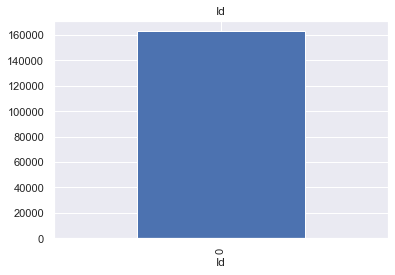

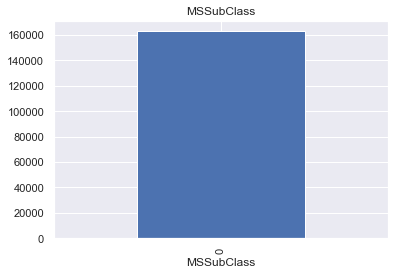

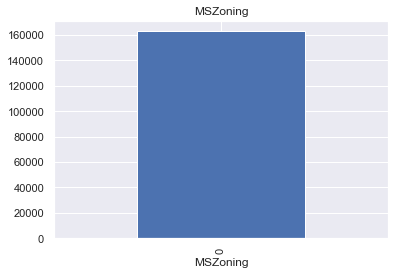

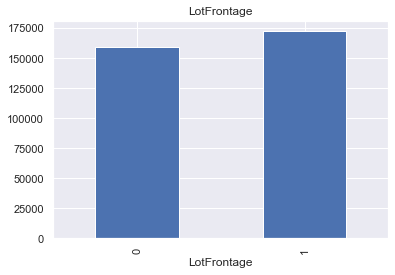

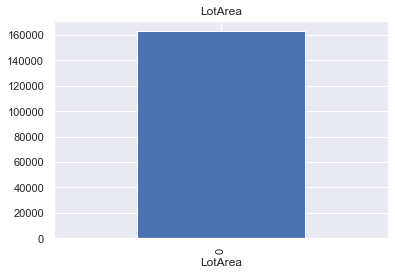

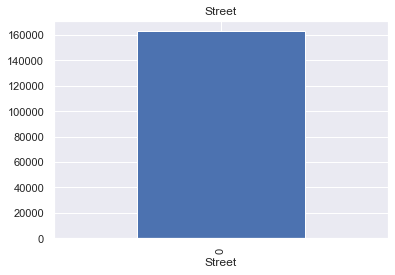

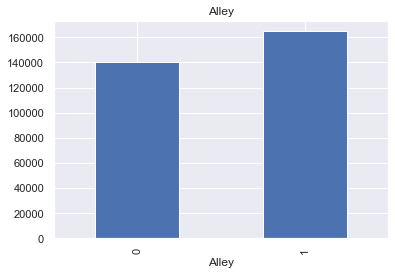

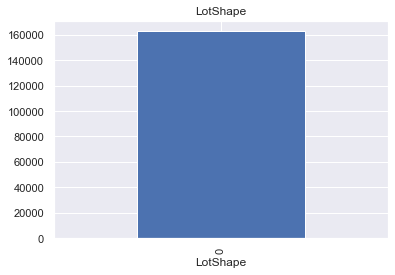

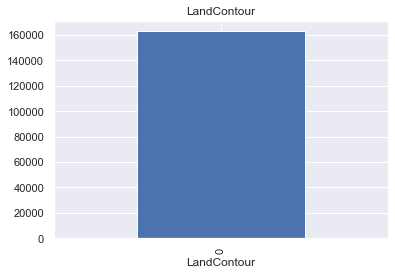

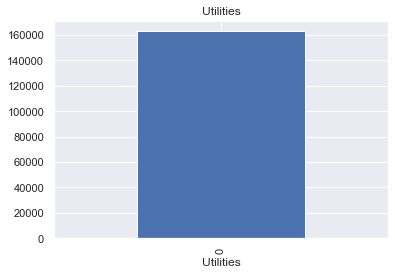

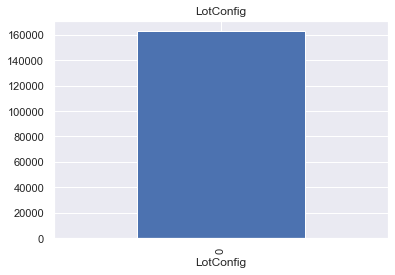

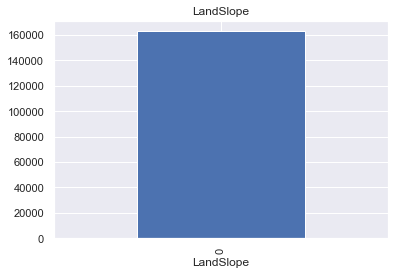

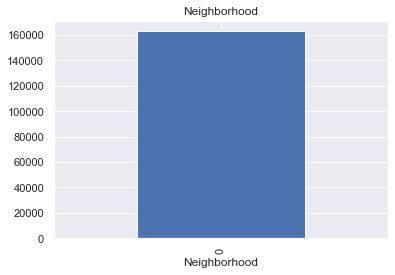

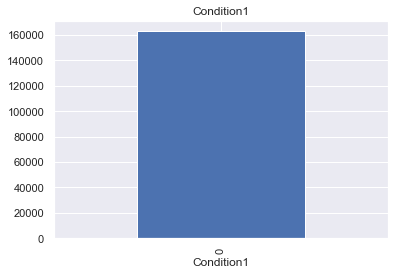

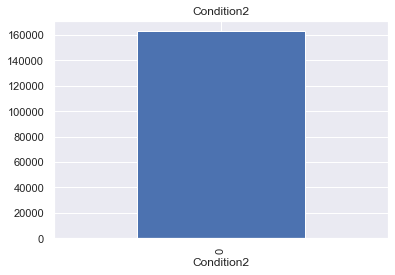

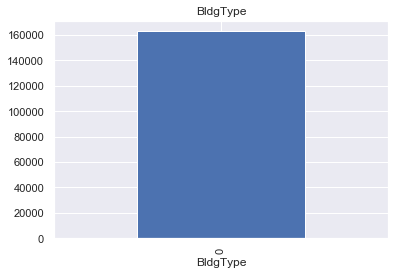

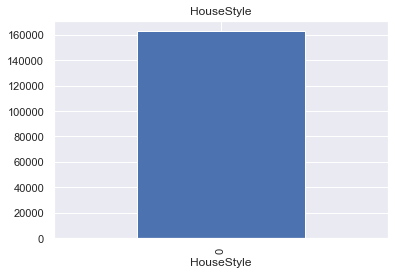

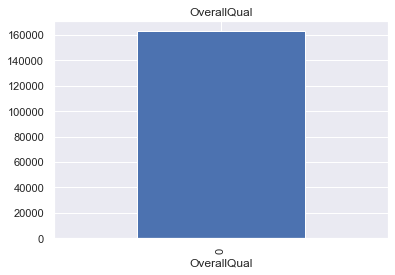

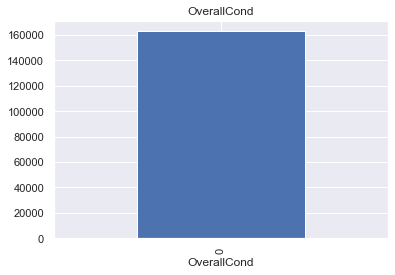

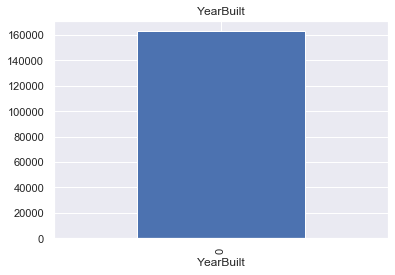

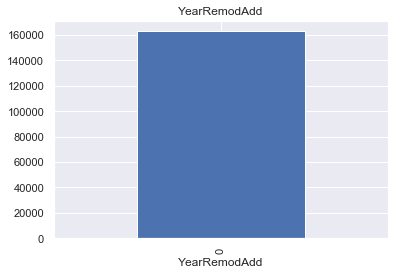

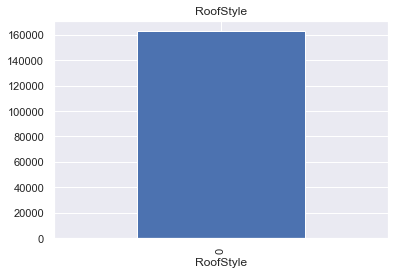

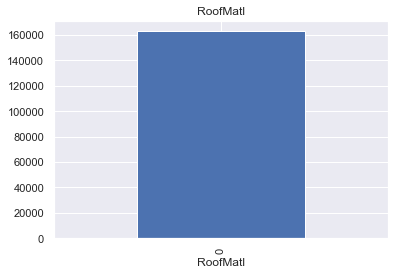

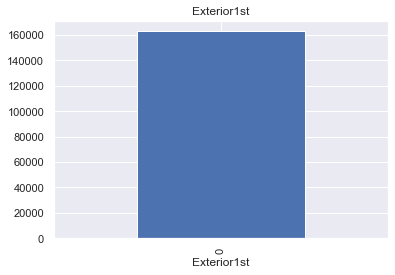

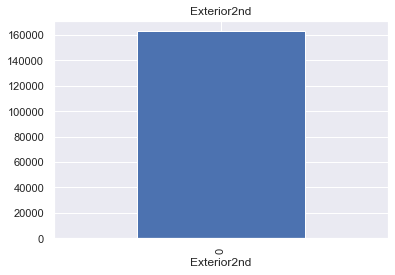

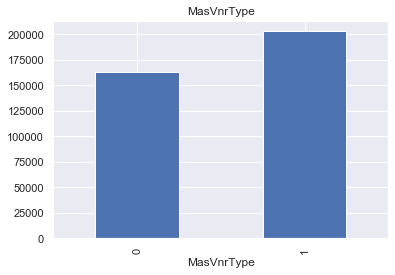

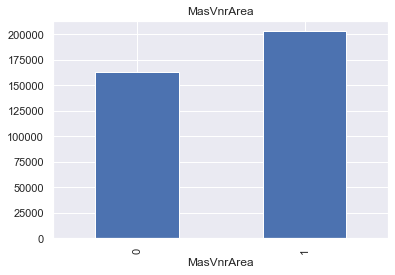

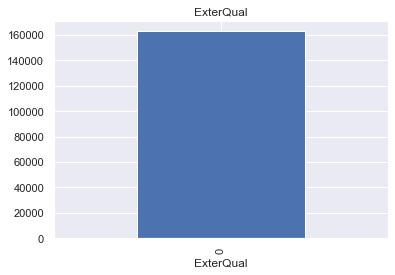

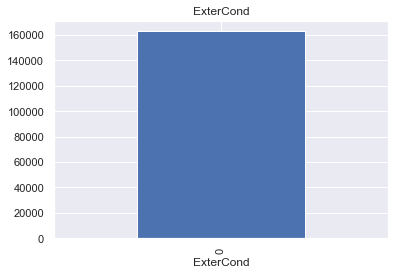

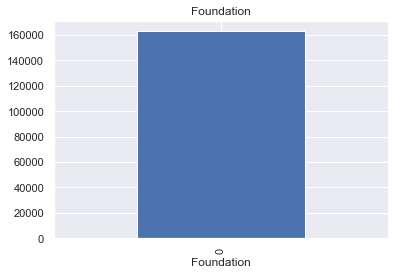

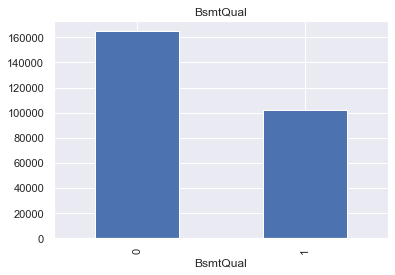

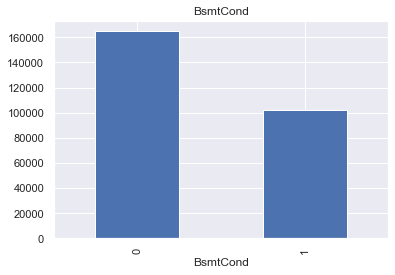

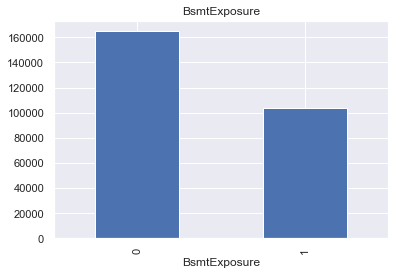

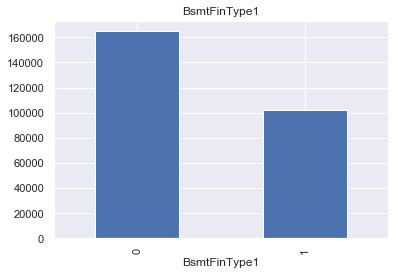

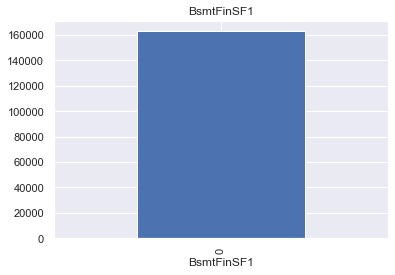

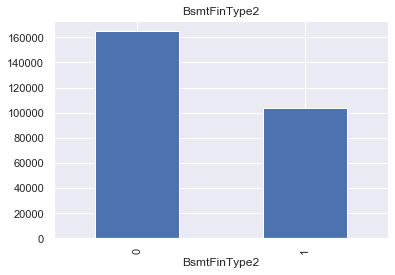

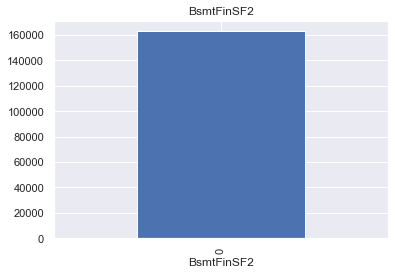

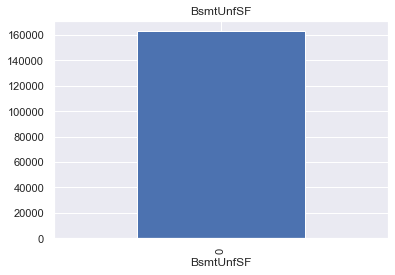

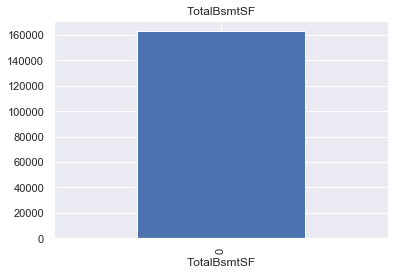

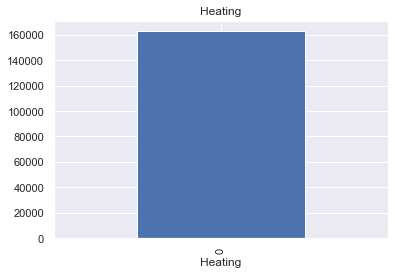

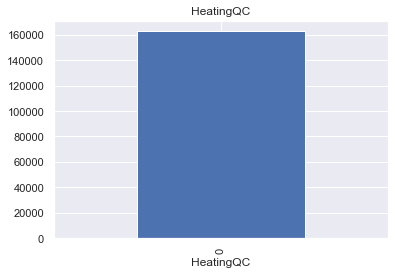

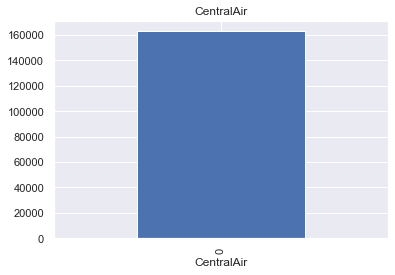

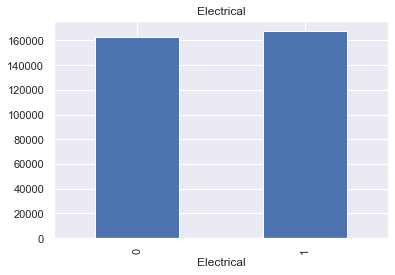

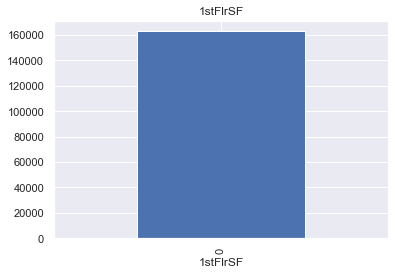

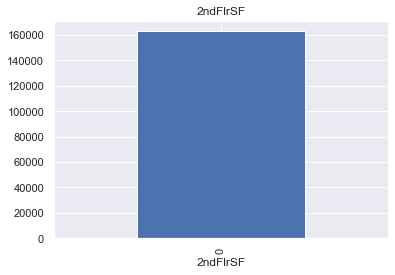

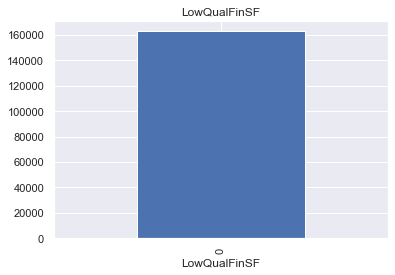

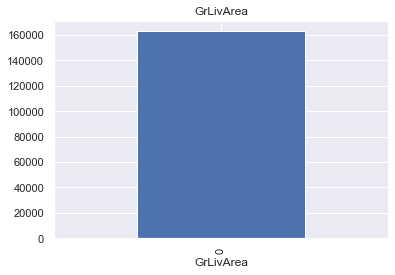

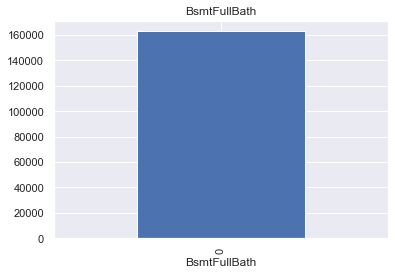

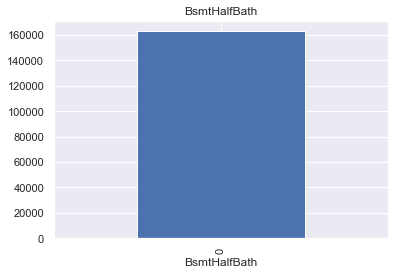

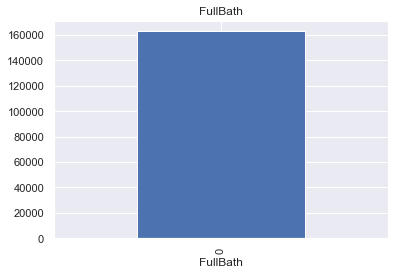

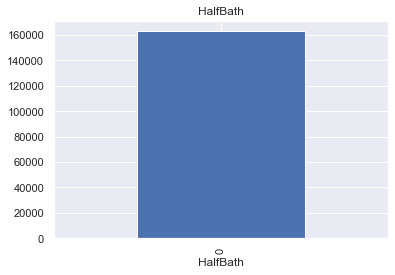

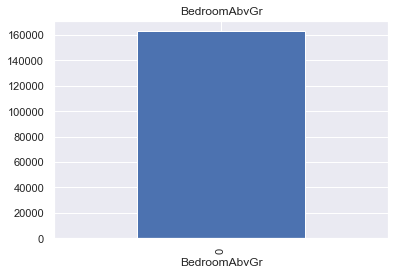

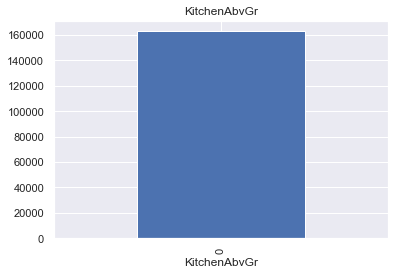

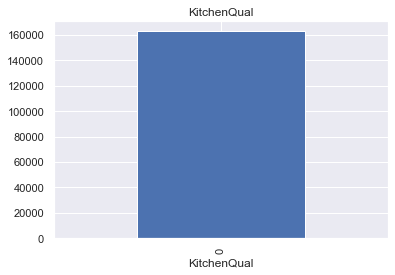

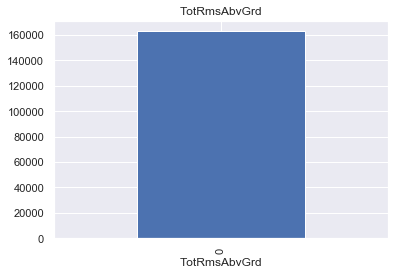

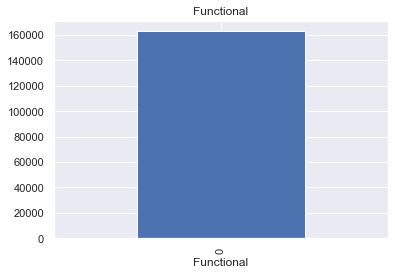

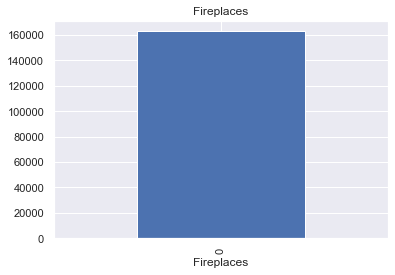

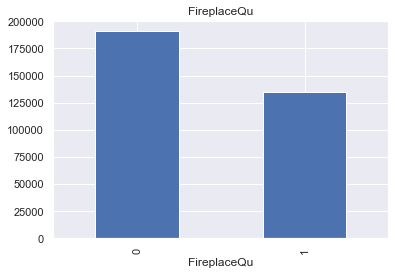

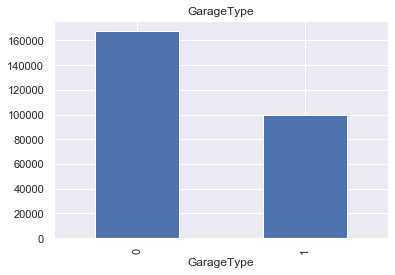

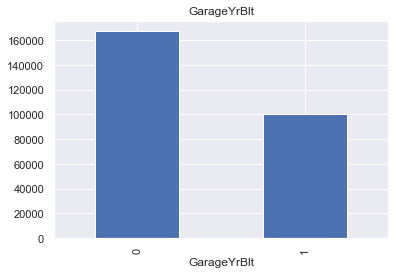

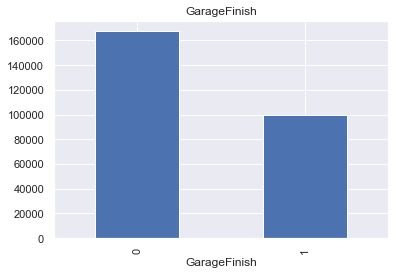

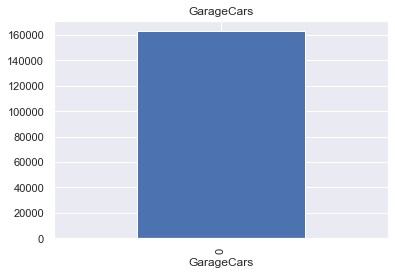

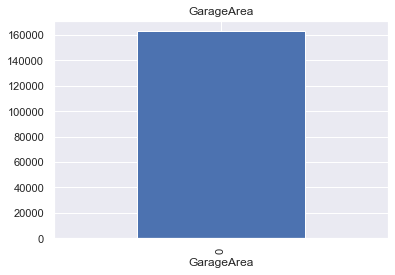

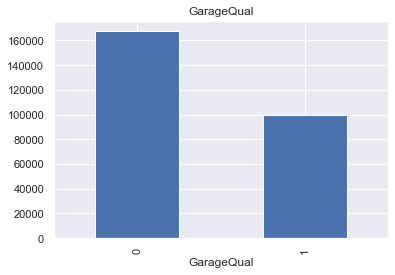

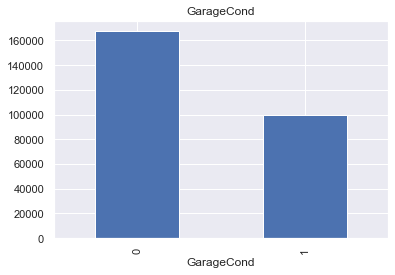

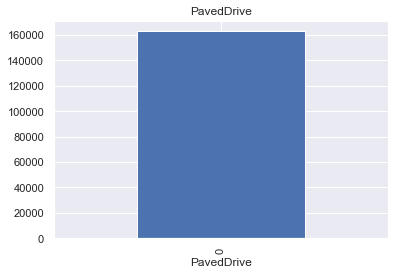

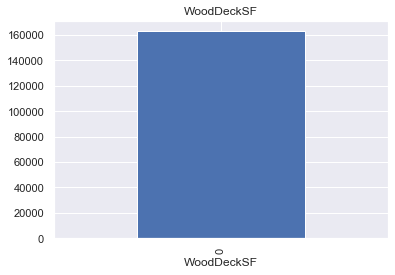

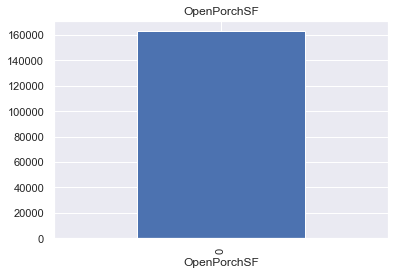

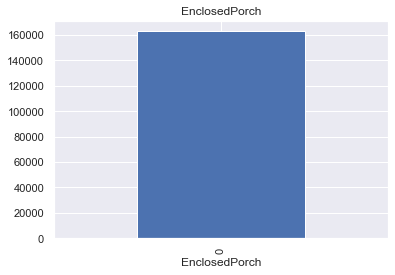

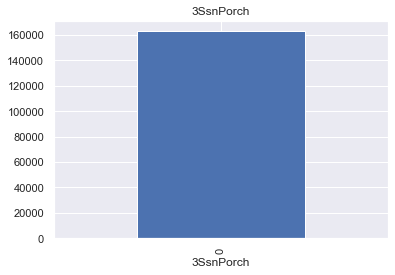

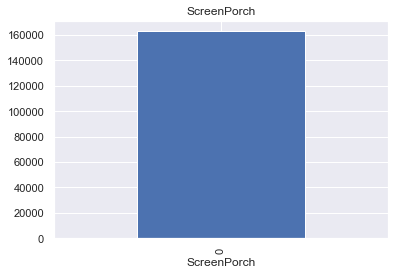

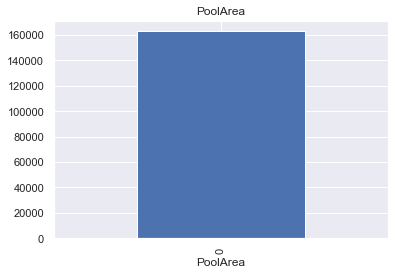

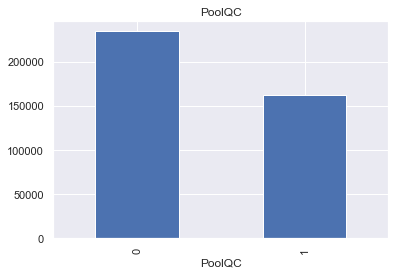

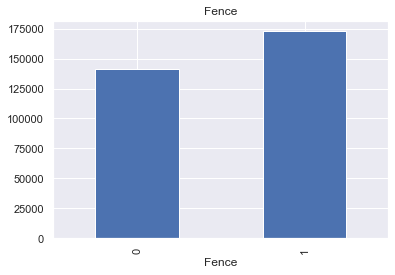

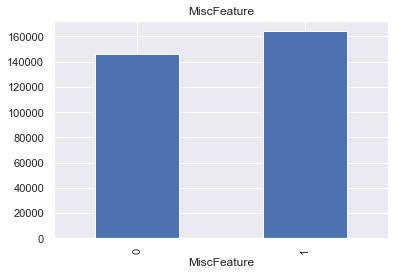

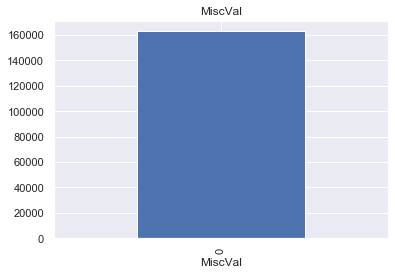

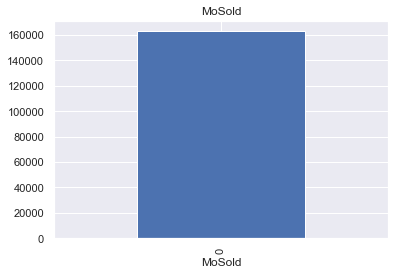

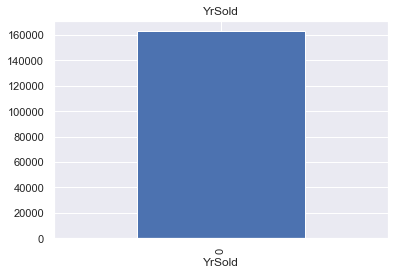

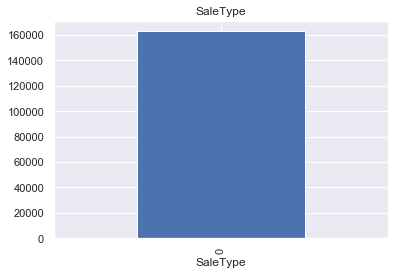

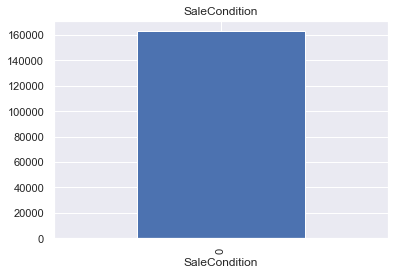

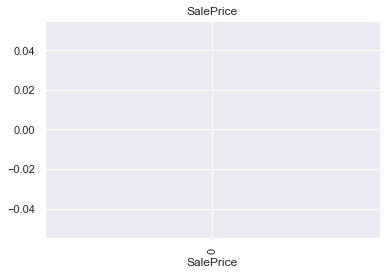

In [8]:
features = df_train.columns
for feature in features:
    data = df_train.copy()
    data[feature] = np.where(data[feature].isnull(),1,0)
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

 ## Numerical/Categorical Data

In [9]:
numerical_features = [feature for feature in df_train.columns if df_train[feature].dtypes!='O']
print('Number of numerical features:',len(numerical_features))
df_train[numerical_features].head()

Number of numerical features: 38


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

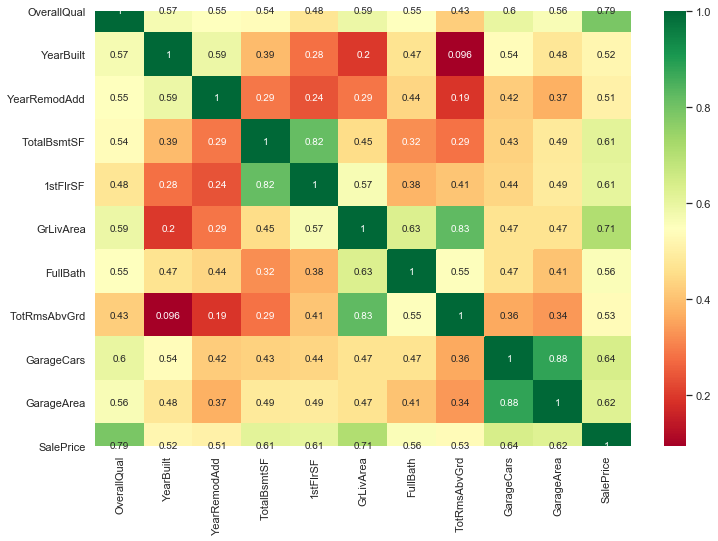

In [10]:
#Let's see how these features influence our target variable using a heatmap.
corrmatrix = df_train.corr()
top_corr_features = corrmatrix.index[abs(corrmatrix["SalePrice"])>=0.5] #We're only selecting highly correlated features.
plt.figure(figsize=(12,8))
sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [11]:
#Here we have some DateTime variables such as YearBuilt, YearRemodAdd, GarageYrBlt, YrSold.
#We can convert these to gain more suitable information such as how old the house by subtracting the YrSold-YearBuilt.
year_vars = ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']

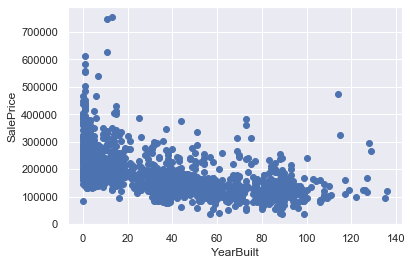

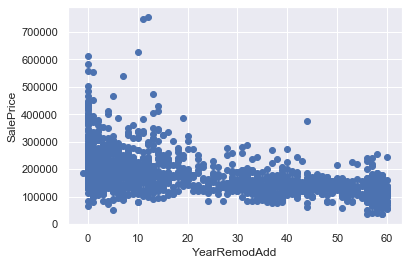

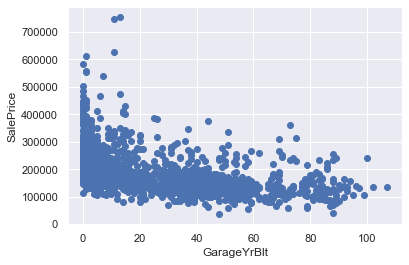

In [12]:
#Let's see the impact of these DateTime features with respect to SalePrice
for feature in year_vars:
    if feature!='YrSold':
        data = df_train.copy()
        data[feature] = data['YrSold']-data[feature] #We'll calculate the difference between the year features and the year the house was sold for.
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [13]:
#Let's look at our discreet features.
discreet_features=[feature for feature in numerical_features if len(df_train[feature].unique())<25 and feature not in year_vars+['Id']]
print('Number of Discreet Features:',len(discreet_features))
df_train[discreet_features].head()

Number of Discreet Features: 17


MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           0           2          0         0        0       2  
1           1           2          0         0        0       5  
2           1           2          0         0        0       9  
3           1           3          0         0        0       2  
4           1           3          0         0        0      12

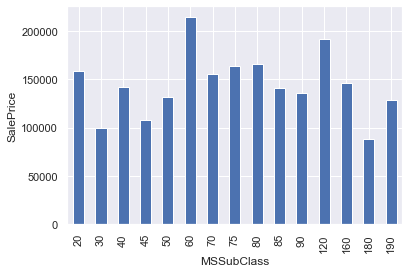

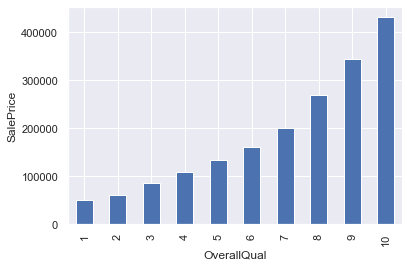

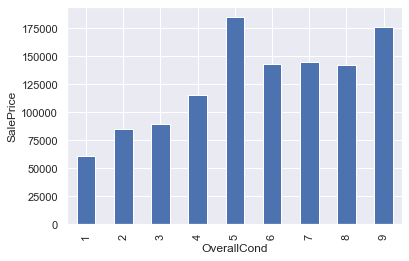

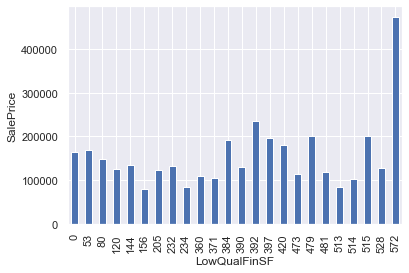

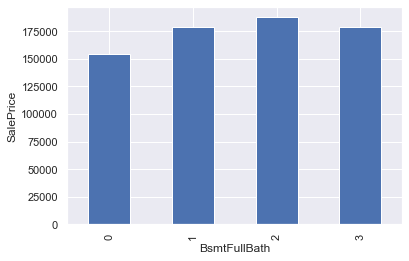

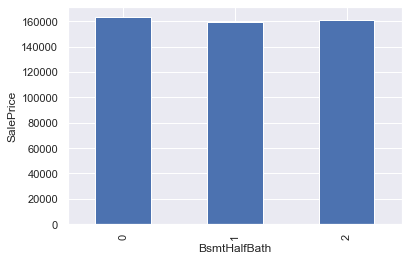

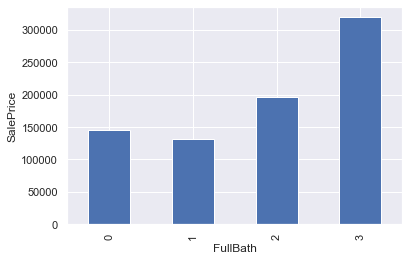

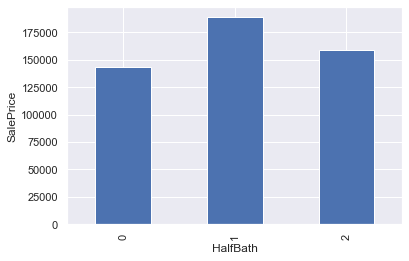

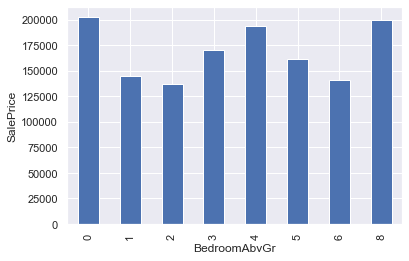

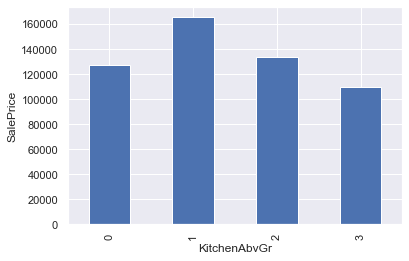

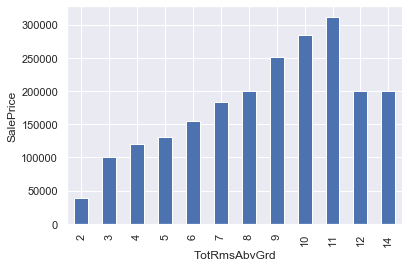

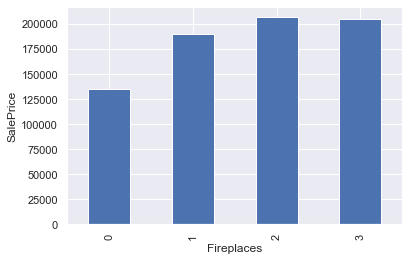

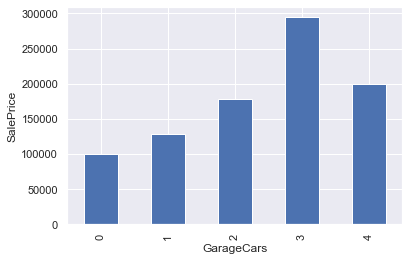

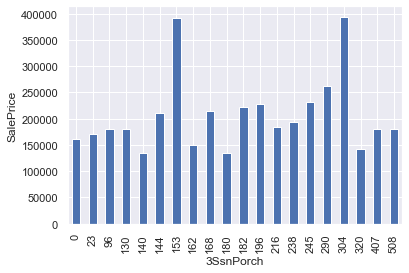

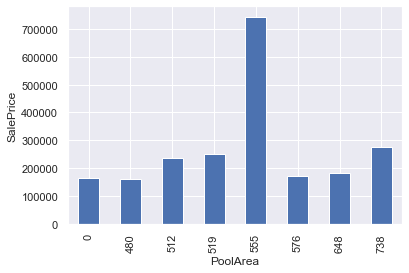

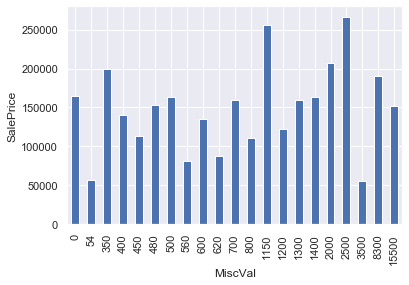

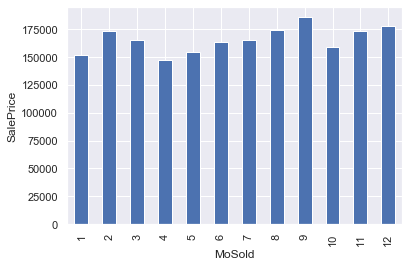

In [14]:
#Let'see how the discreet features vary with the SalePrice using barplots
for feature in discreet_features:
    data = df_train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

In [15]:
#Let's have a look at our continuous features.
continuous_features = [feature for feature in numerical_features if feature not in discreet_features+year_vars+['Id']]
print('Number of Continuous Features:',len(continuous_features))
df_train[continuous_features].head()

Number of Continuous Features: 16


LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  WoodDeckSF  \
0          856       856       854       1710         548           0   
1         1262      1262         0       1262         460         298   
2          920       920       866       1786         608           0   
3          756       961       756       1717         642           0   
4         1145      1145      1053       2198         836         192   

   OpenPorchSF  EnclosedPorch  ScreenPorch  SalePrice  
0           61              0            0     208500  
1            0              0            0     181500  
2           42              0            0     223500  
3           35            272            0     140000  
4           84              0            0     250000

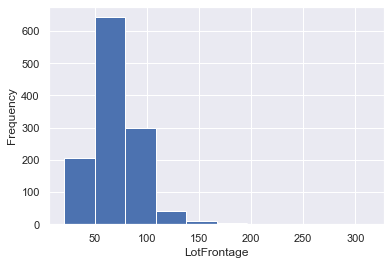

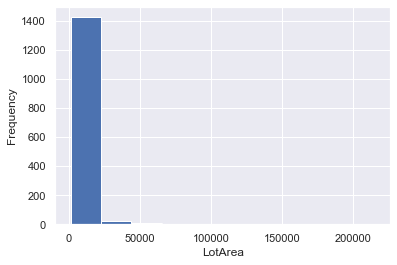

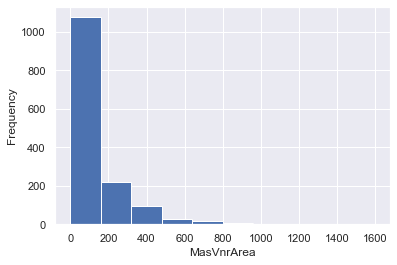

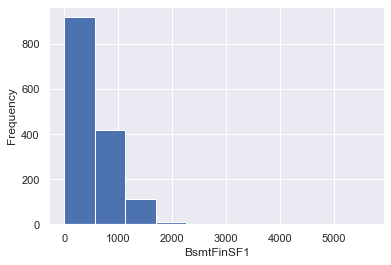

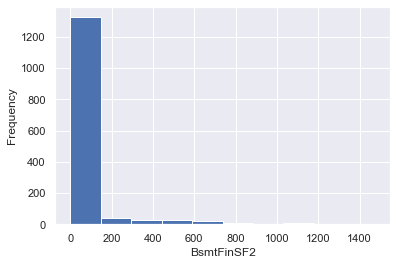

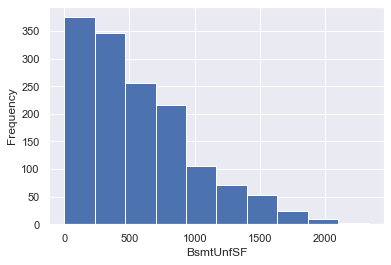

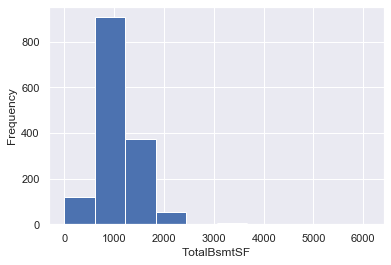

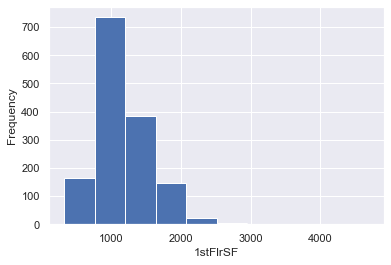

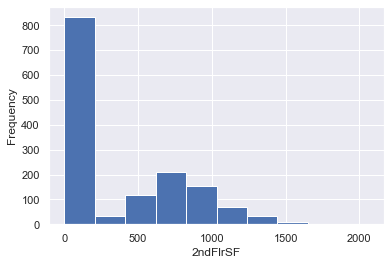

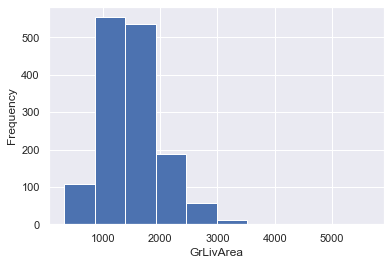

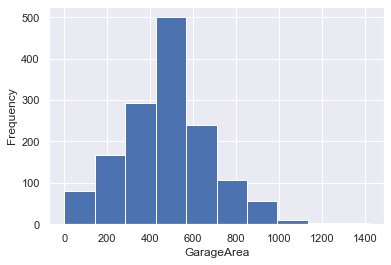

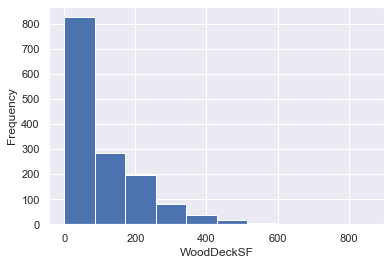

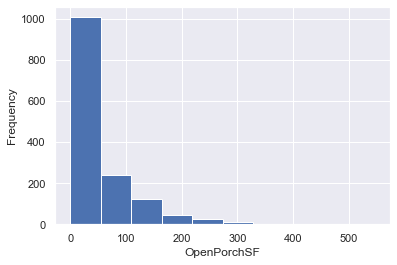

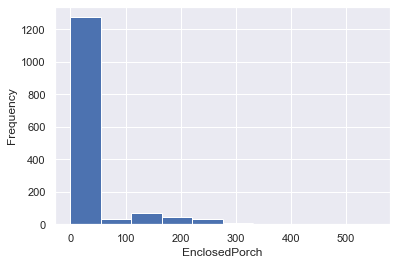

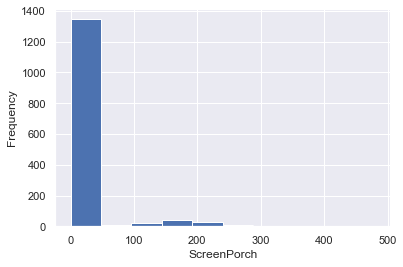

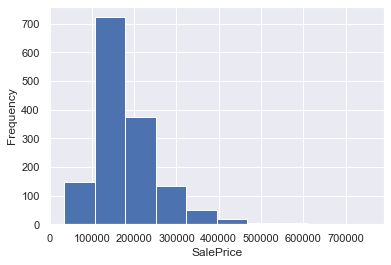

In [16]:
#Let's see the distrbution of continuous variables using histograms.
for feature in continuous_features:
    data = df_train.copy()
    data[feature].hist(bins=10)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [17]:
#Finally let's look at our categorical features.
categorical_features = [feature for feature in df_train.columns if df_train[feature].dtypes=='O']
print('Number of Categorical Features:',len(categorical_features))
df_train[categorical_features].head()

Number of Categorical Features: 43


MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

In [18]:
#Let's check how many categories are present in each feature.
for feature in categorical_features:
    print(feature,'has',len(df_train[feature].unique()),'categories')

MSZoning has 5 categories
Street has 2 categories
Alley has 3 categories
LotShape has 4 categories
LandContour has 4 categories
Utilities has 2 categories
LotConfig has 5 categories
LandSlope has 3 categories
Neighborhood has 25 categories
Condition1 has 9 categories
Condition2 has 8 categories
BldgType has 5 categories
HouseStyle has 8 categories
RoofStyle has 6 categories
RoofMatl has 8 categories
Exterior1st has 15 categories
Exterior2nd has 16 categories
MasVnrType has 5 categories
ExterQual has 4 categories
ExterCond has 5 categories
Foundation has 6 categories
BsmtQual has 5 categories
BsmtCond has 5 categories
BsmtExposure has 5 categories
BsmtFinType1 has 7 categories
BsmtFinType2 has 7 categories
Heating has 6 categories
HeatingQC has 5 categories
CentralAir has 2 categories
Electrical has 6 categories
KitchenQual has 4 categories
Functional has 7 categories
FireplaceQu has 6 categories
GarageType has 7 categories
GarageFinish has 4 categories
GarageQual has 6 categories
Garag

In [19]:
for feature in categorical_features:
    print(feature,':',df_train[feature].unique())

MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street : ['Pave' 'Grvl']
Alley : [nan 'Grvl' 'Pave']
LotShape : ['Reg' 'IR1' 'IR2' 'IR3']
LandContour : ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities : ['AllPub' 'NoSeWa']
LotConfig : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope : ['Gtl' 'Mod' 'Sev']
Neighborhood : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle : ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl : ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Ex

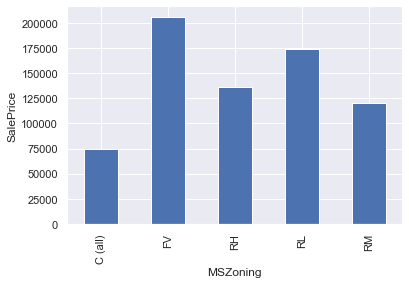

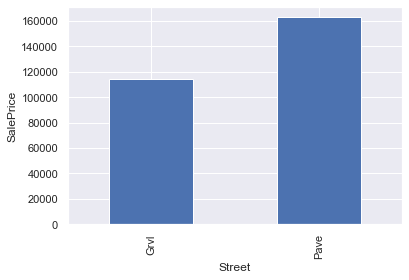

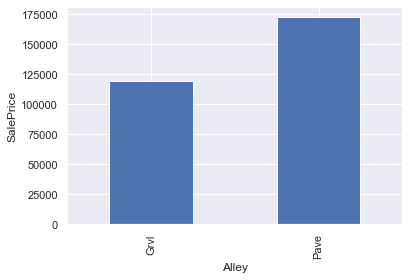

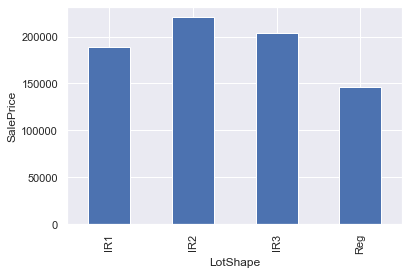

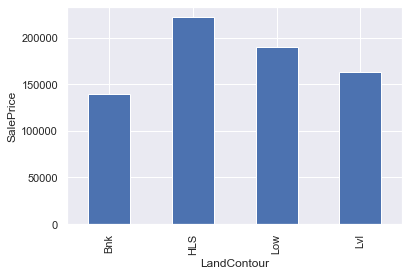

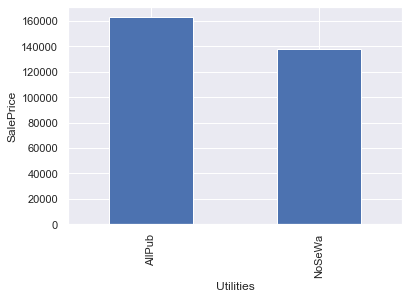

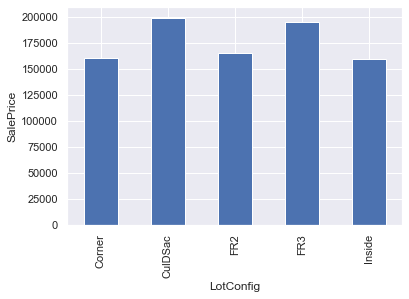

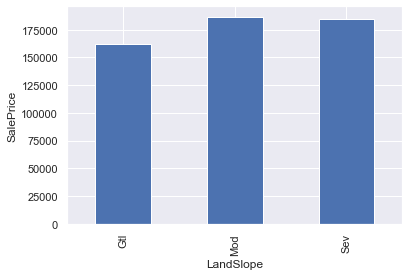

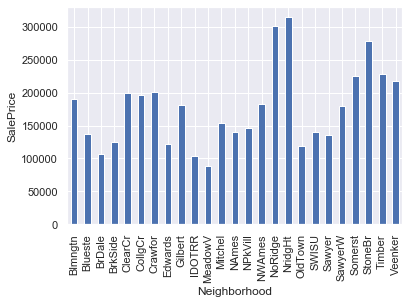

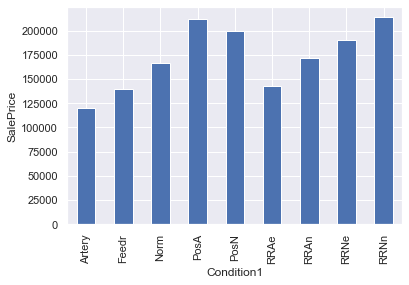

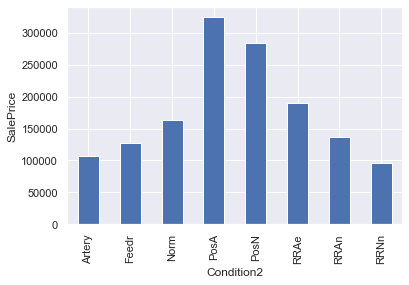

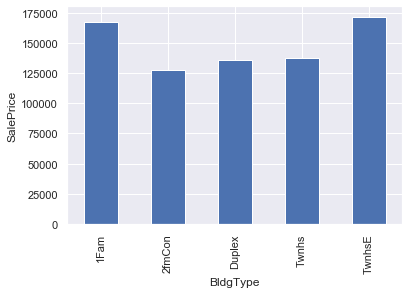

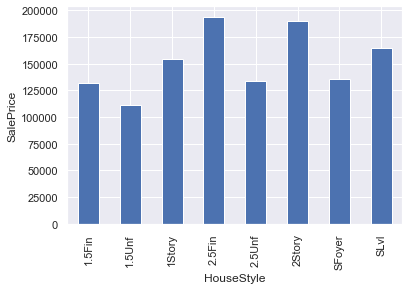

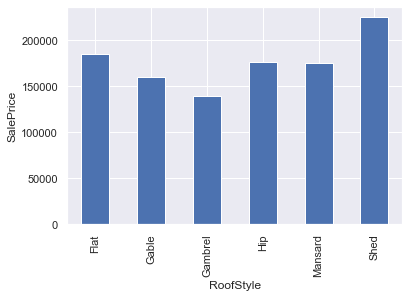

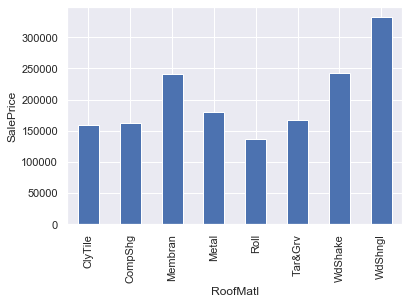

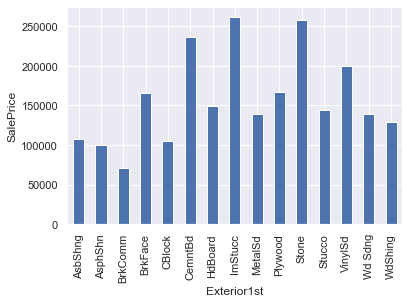

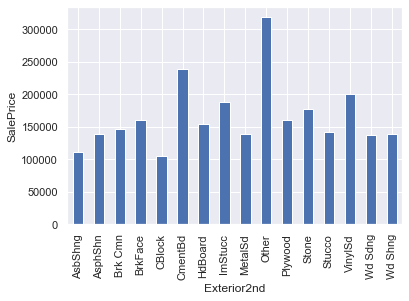

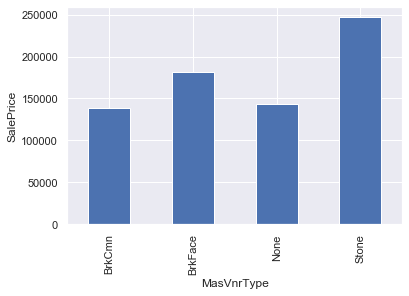

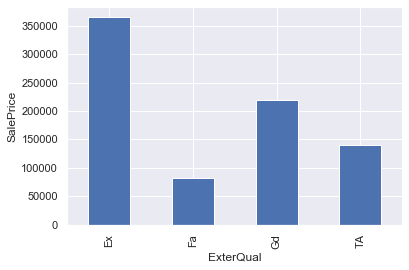

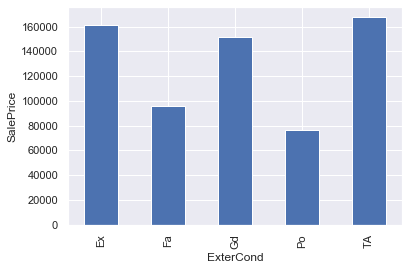

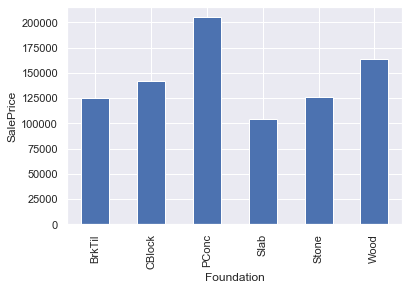

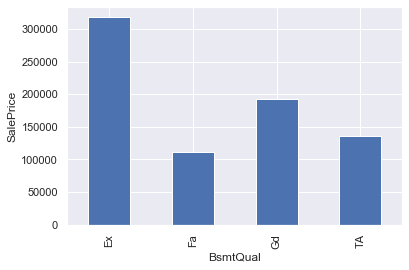

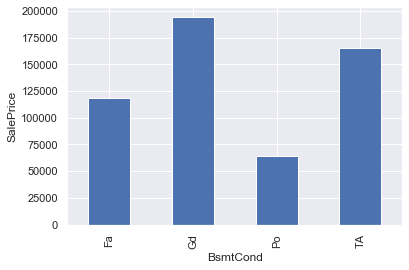

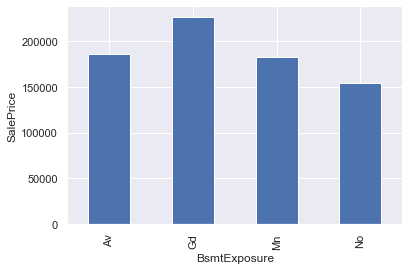

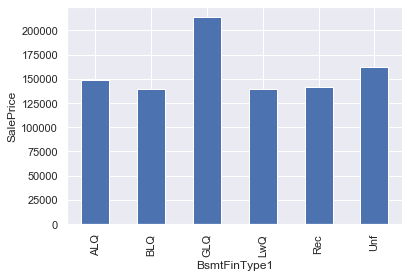

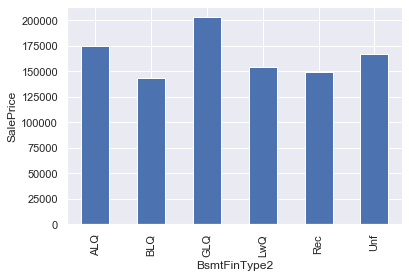

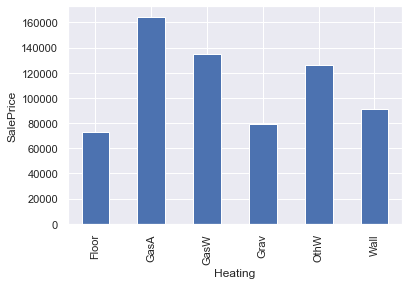

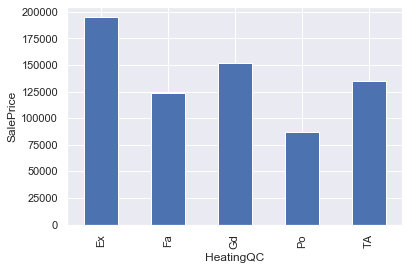

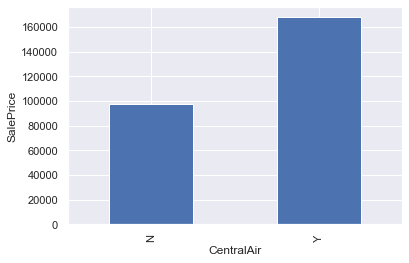

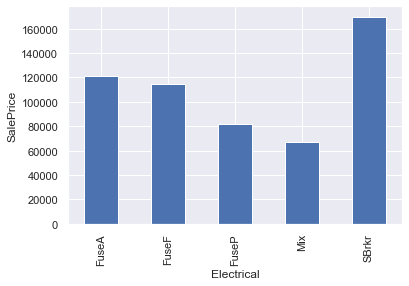

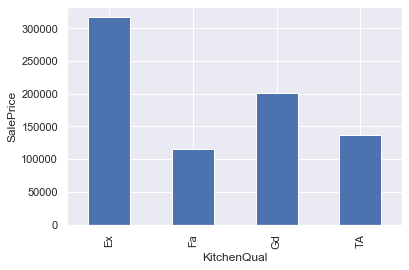

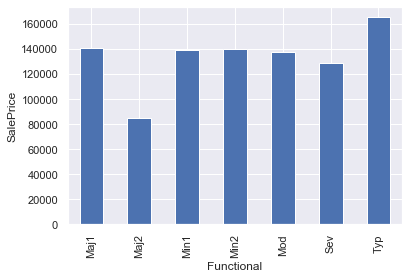

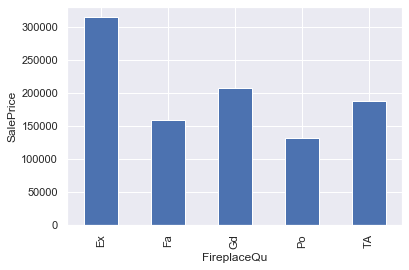

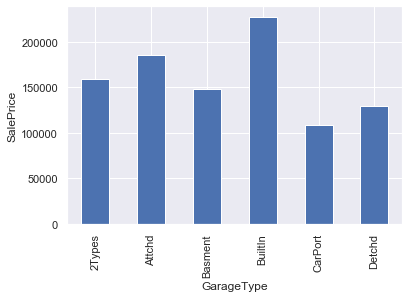

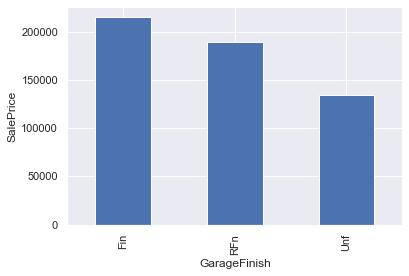

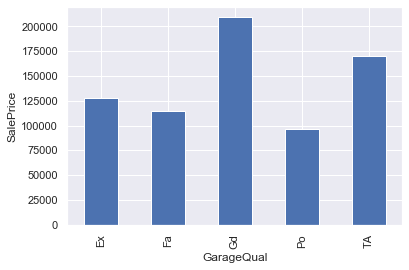

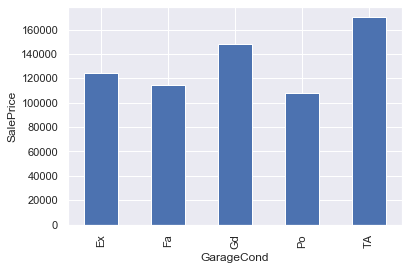

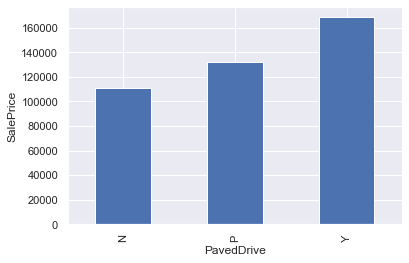

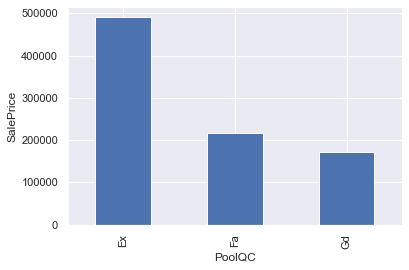

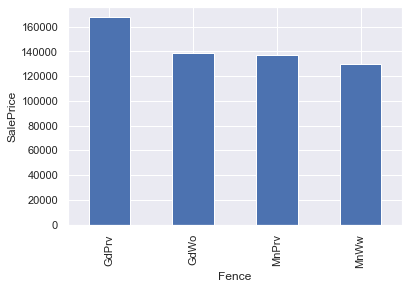

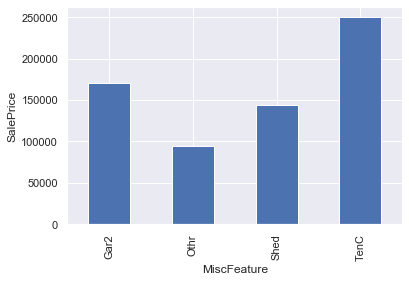

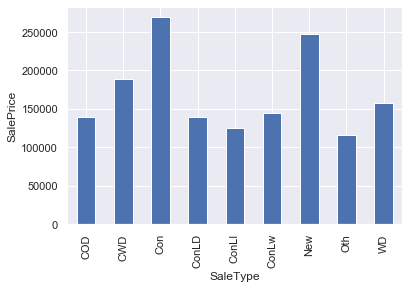

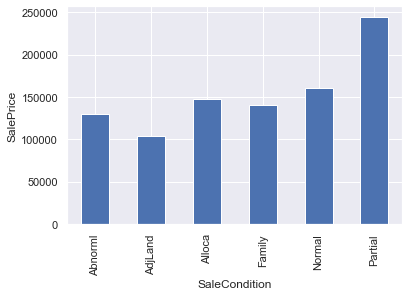

In [20]:
#Let's oberserve the relationship between these categorical features and SalePrice using barplots and boxplots.
for feature in categorical_features:
    data = df_train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

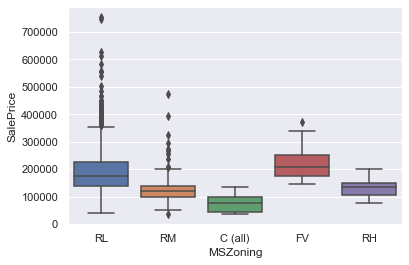

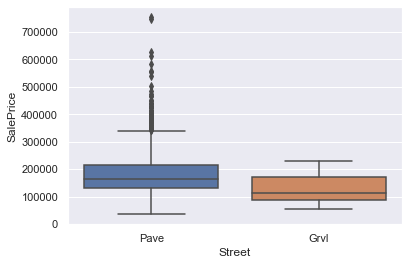

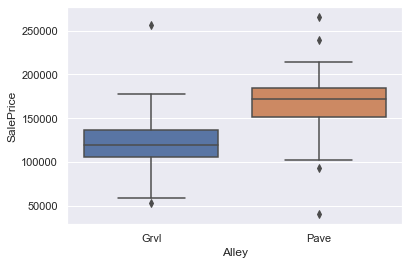

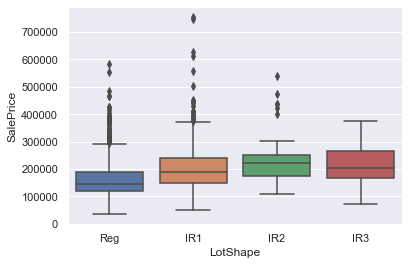

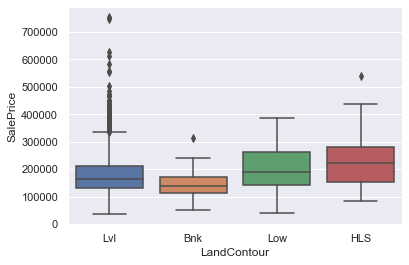

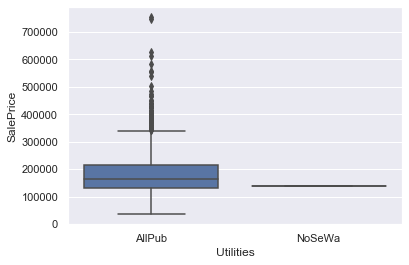

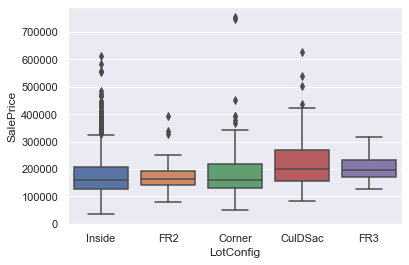

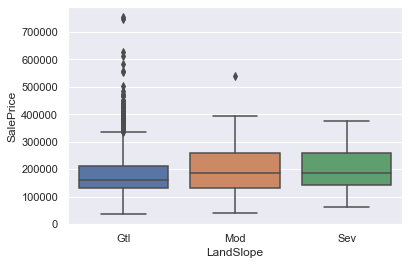

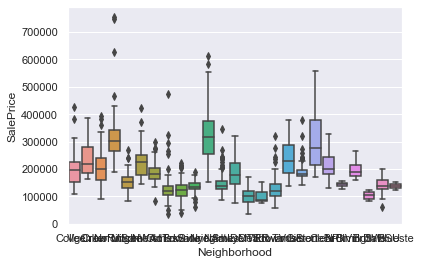

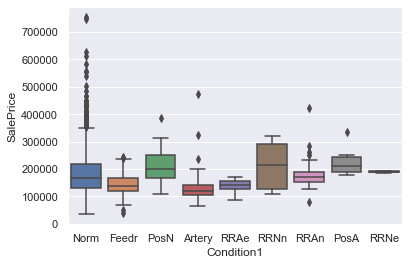

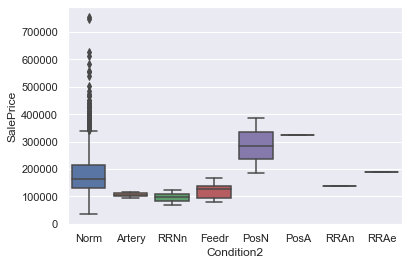

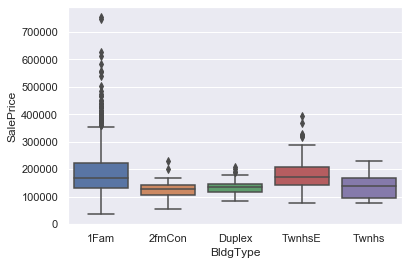

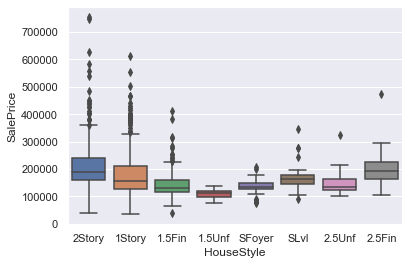

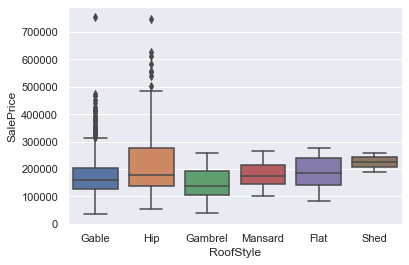

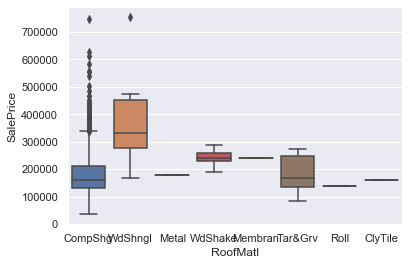

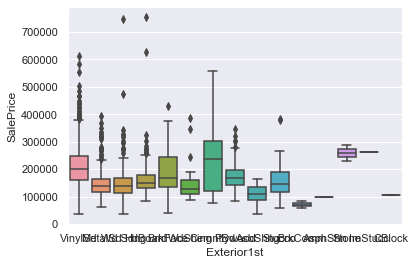

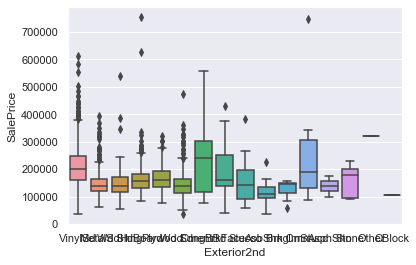

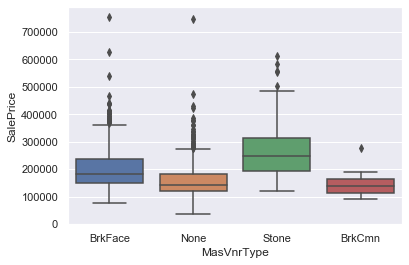

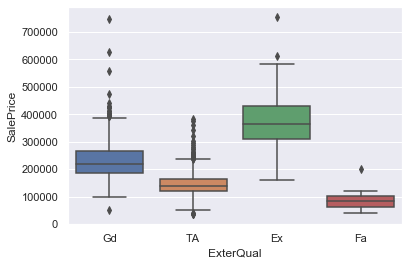

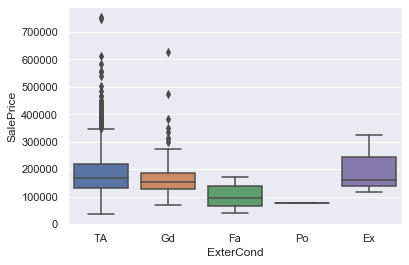

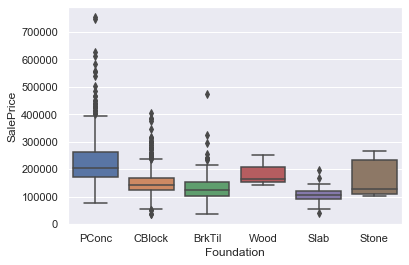

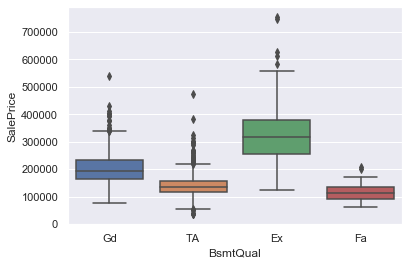

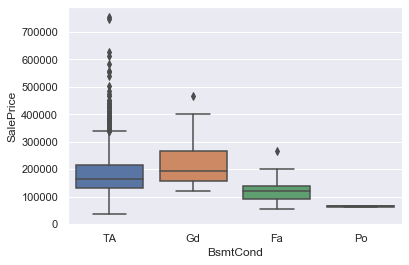

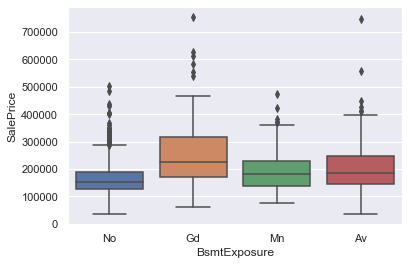

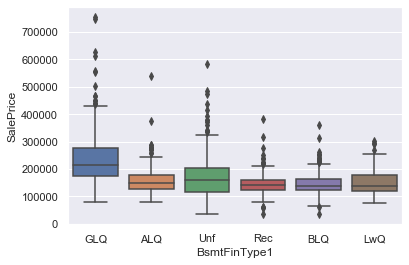

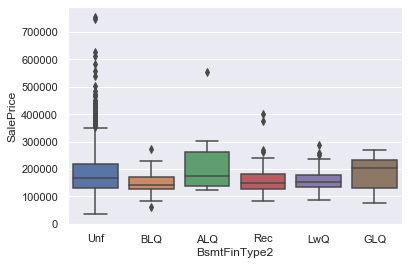

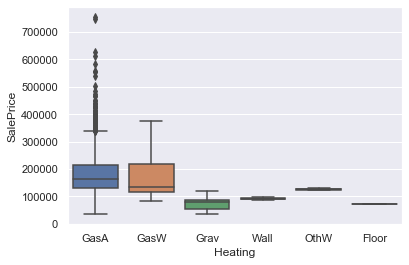

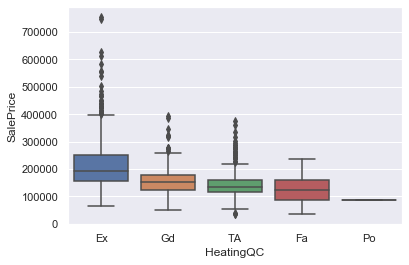

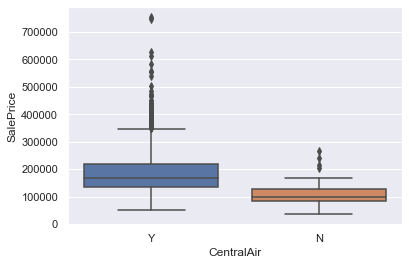

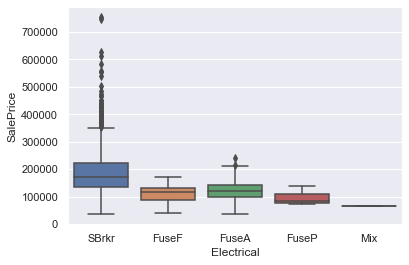

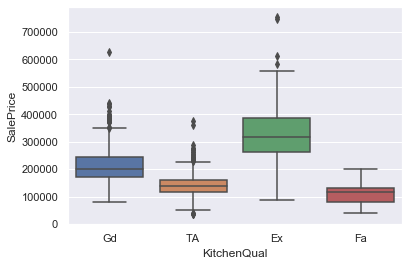

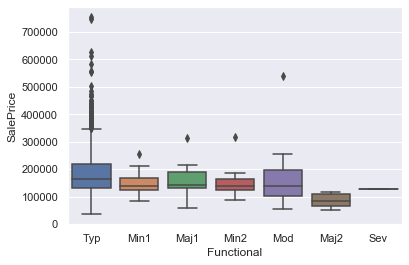

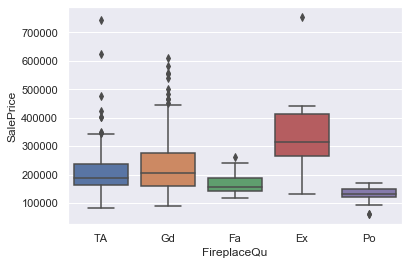

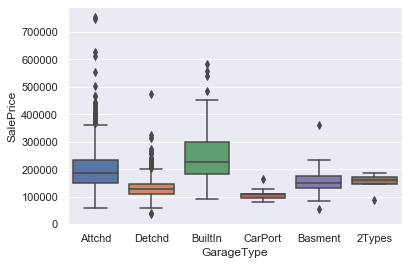

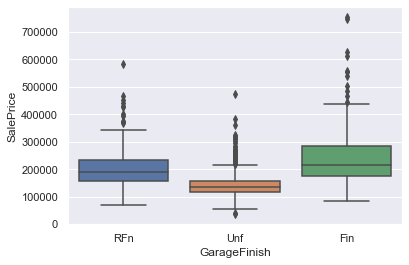

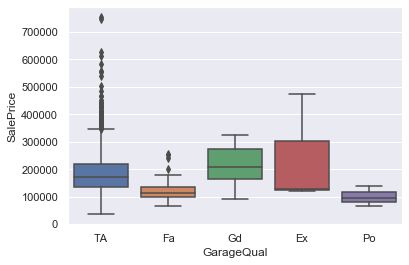

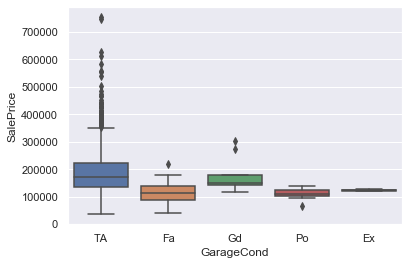

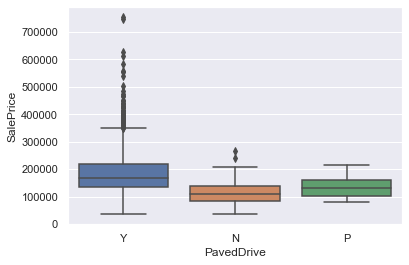

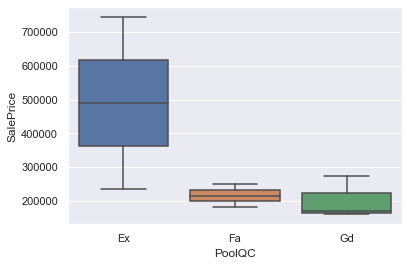

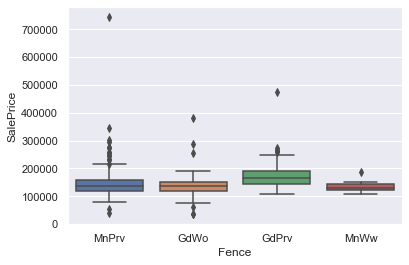

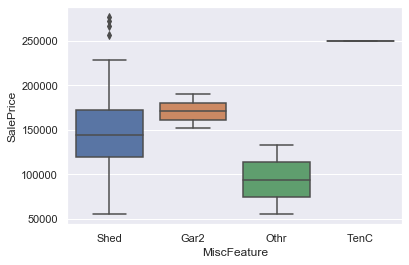

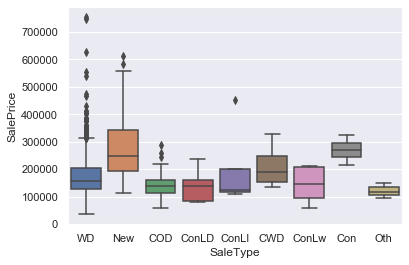

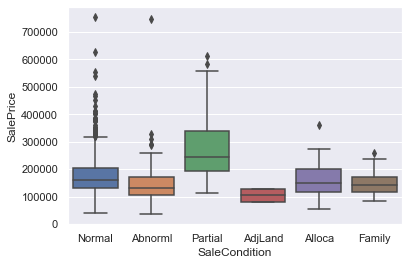

In [21]:
#Let's use boxplots for a better visualization.
for feature in categorical_features:
    sns.boxplot(x=feature,y='SalePrice',data=df_train)
    plt.xlabel(feature)
    plt.show()

## Outliers

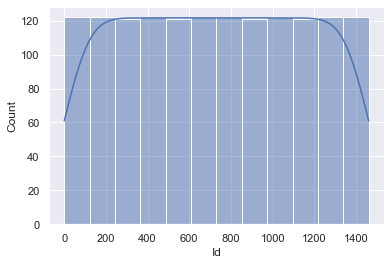

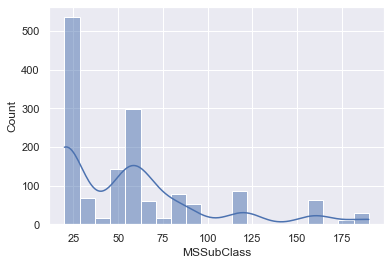

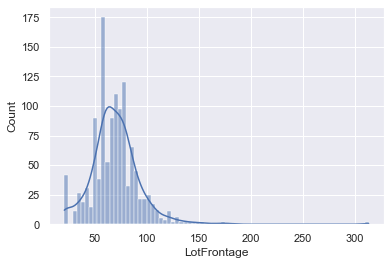

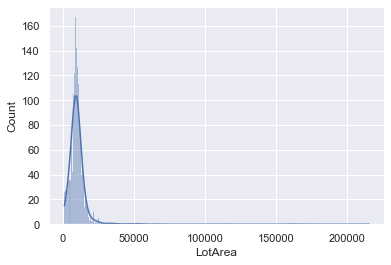

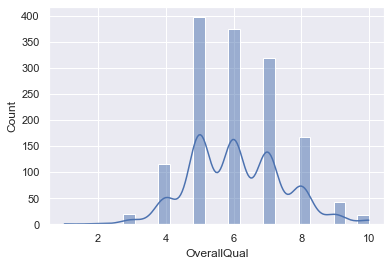

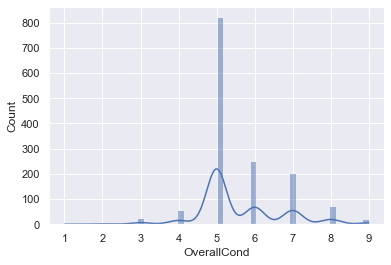

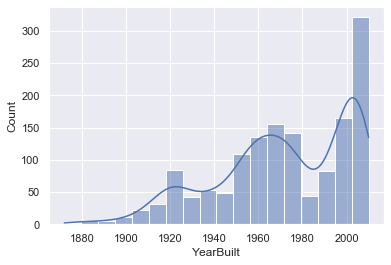

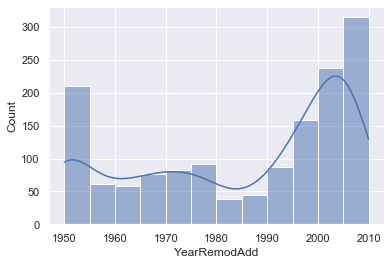

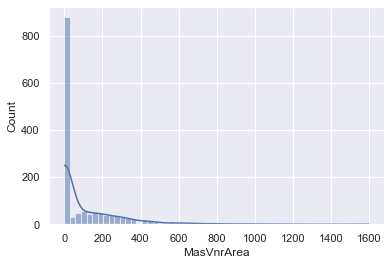

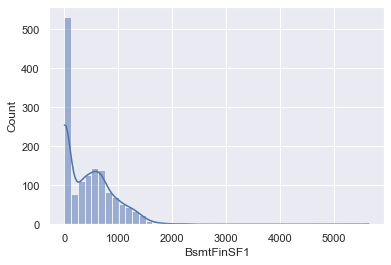

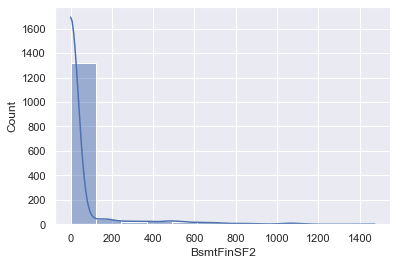

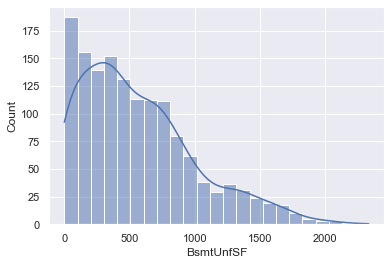

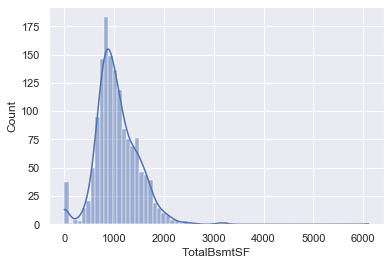

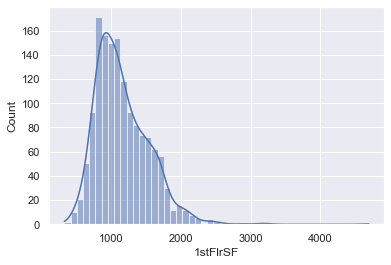

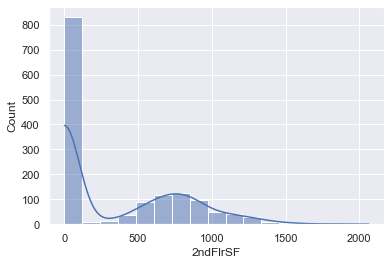

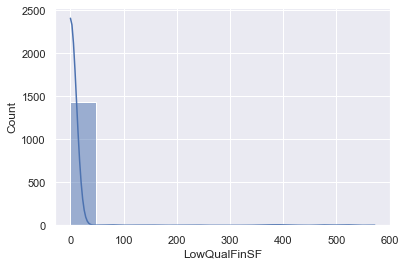

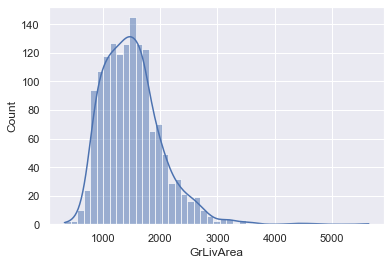

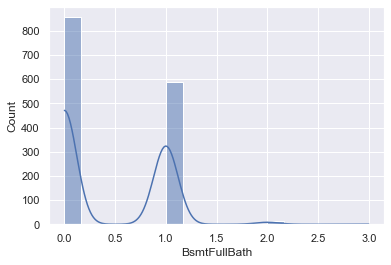

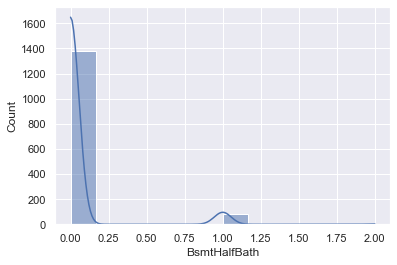

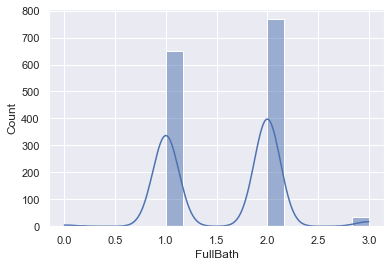

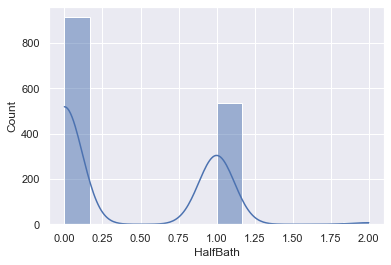

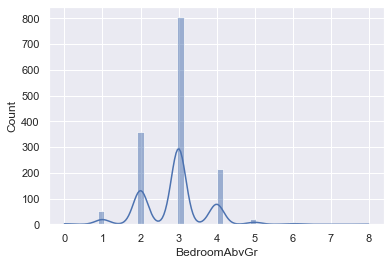

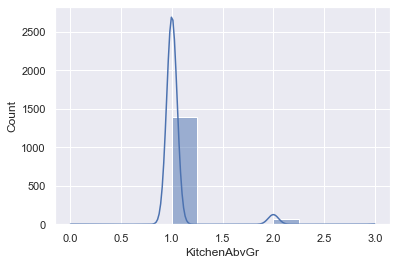

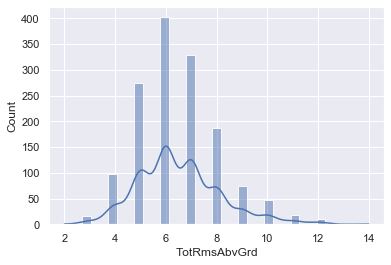

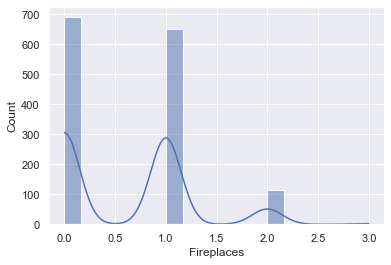

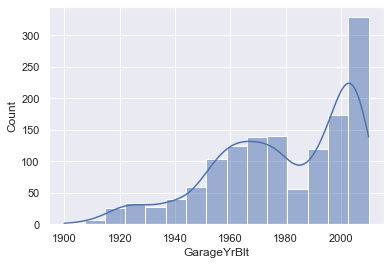

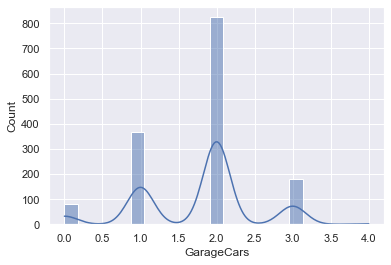

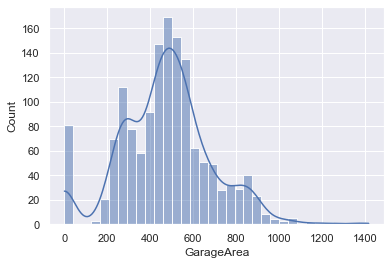

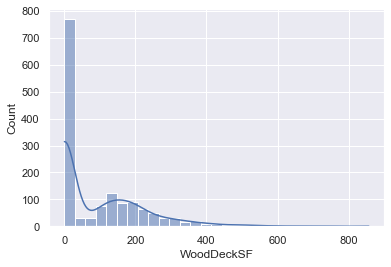

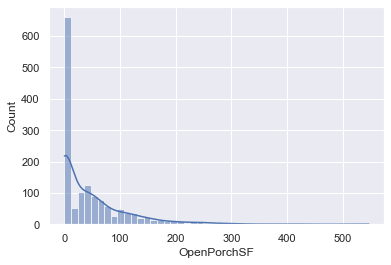

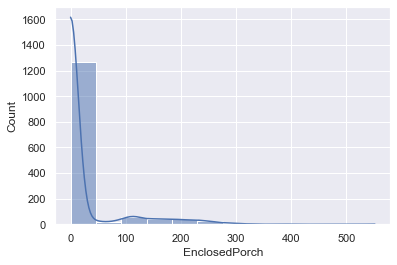

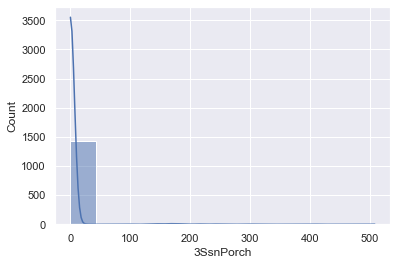

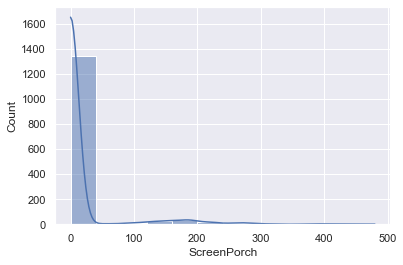

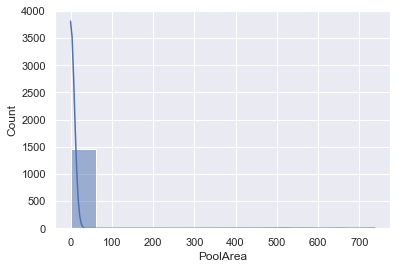

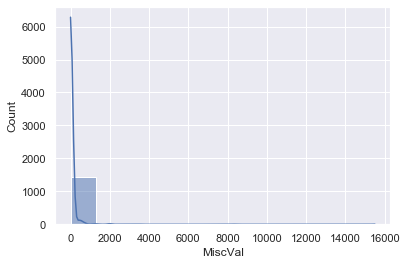

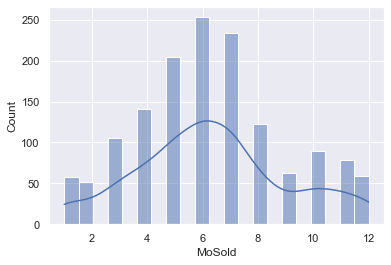

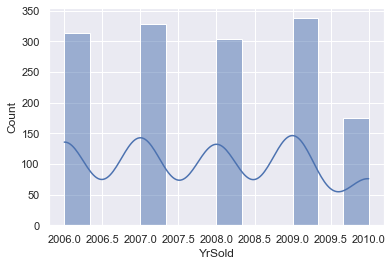

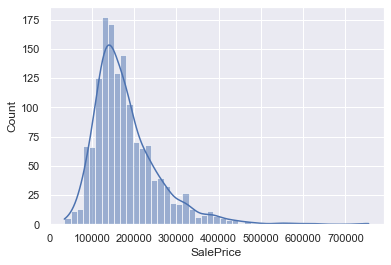

In [22]:
for feature in numerical_features:
    sns.histplot(df_train[feature],kde=True)
    plt.show()

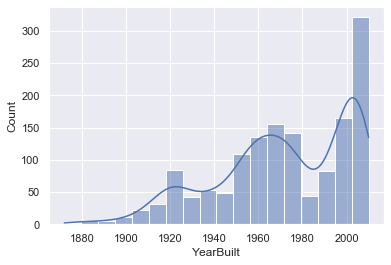

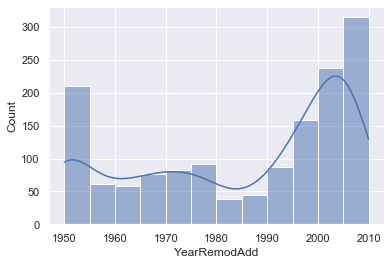

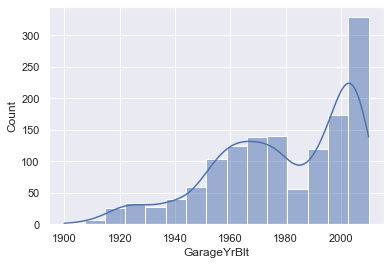

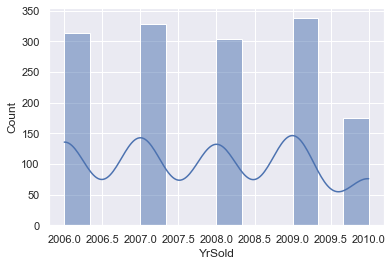

In [23]:
for feature in year_vars:
    sns.histplot(df_train[feature],kde=True)
    plt.show()

## Feature Engineering

In [24]:
#Let's see how we can deal with the missing values in categorical_features.
nan_cat_features = [feature for feature in df_train.columns if df_train[feature].isnull().sum()>1 and df_train[feature].dtypes=='O']
for feature in nan_cat_features:
    print("{}: {}% missing values".format(feature,np.round(df_train[feature].isnull().mean()*100,2)))

Alley: 93.77% missing values
MasVnrType: 0.55% missing values
BsmtQual: 2.53% missing values
BsmtCond: 2.53% missing values
BsmtExposure: 2.6% missing values
BsmtFinType1: 2.53% missing values
BsmtFinType2: 2.6% missing values
FireplaceQu: 47.26% missing values
GarageType: 5.55% missing values
GarageFinish: 5.55% missing values
GarageQual: 5.55% missing values
GarageCond: 5.55% missing values
PoolQC: 99.52% missing values
Fence: 80.75% missing values
MiscFeature: 96.3% missing values


In [25]:
df_train.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [26]:
def impute_nan(df,variable):
    most_frequent_category = df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [27]:
def impute_nan(df,variable):
    most_frequent_category = df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [28]:
nan_cat_features_new = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond']

In [29]:
for feature in nan_cat_features_new:
    impute_nan(df_train,feature)

In [30]:
df_train[nan_cat_features_new].isnull().sum()

MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [31]:
#Similarly for the test dataset.
nan_cat_features = [feature for feature in df_test.columns if df_test[feature].isnull().sum()>1 and df_test[feature].dtypes=='O']
for feature in nan_cat_features:
    print('{}: {}% missing values'.format(feature,np.round(df_test[feature].isnull().mean()*100,2)))

MSZoning: 0.27% missing values
Alley: 92.67% missing values
Utilities: 0.14% missing values
MasVnrType: 1.1% missing values
BsmtQual: 3.02% missing values
BsmtCond: 3.08% missing values
BsmtExposure: 3.02% missing values
BsmtFinType1: 2.88% missing values
BsmtFinType2: 2.88% missing values
Functional: 0.14% missing values
FireplaceQu: 50.03% missing values
GarageType: 5.21% missing values
GarageFinish: 5.35% missing values
GarageQual: 5.35% missing values
GarageCond: 5.35% missing values
PoolQC: 99.79% missing values
Fence: 80.12% missing values
MiscFeature: 96.5% missing values


In [32]:
df_test.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [33]:
nan_cat_features_new = ['MSZoning','Utilities','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond']

In [34]:
def impute_test_nan(df,variable):
    most_frequent_category = df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [35]:
for feature in nan_cat_features_new:
    impute_test_nan(df_test,feature)

In [36]:
df_test[nan_cat_features_new].isnull().sum()

MSZoning        0
Utilities       0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [37]:
#Let's see how we can deal with missing values in numerical features.
nan_num_features = [feature for feature in df_train.columns if df_train[feature].isnull().sum()>1 and df_train[feature].dtypes!='O']
for feature in nan_num_features:
    print('{}: {}% missing values'.format(feature,np.round(df_train[feature].isnull().mean()*100,2)))

LotFrontage: 17.74% missing values
MasVnrArea: 0.55% missing values
GarageYrBlt: 5.55% missing values


In [38]:
# Here I am using Median imputation since our dataset contains quite a lot of outliers.
for feature in nan_num_features:
    median = df_train[feature].median()
    df_train[feature].fillna(median,inplace=True)

In [39]:
for feature in nan_num_features:
    median = df_train[feature].median()
    df_train[feature].fillna(median,inplace=True)

In [40]:
df_train[nan_num_features].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [41]:
#Similarly for the test dataset.
nan_num_features = [feature for feature in df_test.columns if df_test[feature].isnull().sum()>1 and df_test[feature].dtypes!='O']
for feature in nan_num_features:
    print('{}: {}% missing values'.format(feature,np.round(df_test[feature].isnull().mean()*100,2)))

LotFrontage: 15.56% missing values
MasVnrArea: 1.03% missing values
BsmtFullBath: 0.14% missing values
BsmtHalfBath: 0.14% missing values
GarageYrBlt: 5.35% missing values


In [42]:
for feature in nan_num_features:
    median = df_test[feature].median()
    df_test[feature].fillna(median,inplace=True)
df_test[nan_num_features].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
dtype: int64

In [43]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    df_train[feature] = df_train['YrSold']-df_train[feature]

In [44]:
df_train[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

YearBuilt  YearRemodAdd  GarageYrBlt
0          5             5          5.0
1         31            31         31.0
2          7             6          7.0
3         91            36          8.0
4          8             8          8.0

In [45]:
#Similarly for test dataset.
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    df_test[feature] = df_test['YrSold']-df_test[feature]

In [46]:
df_test[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

YearBuilt  YearRemodAdd  GarageYrBlt
0         49            49         49.0
1         52            52         52.0
2         13            12         13.0
3         12            12         12.0
4         18            18         18.0

## Feature Transformation

In [47]:
#Ok so let's use a Q-Q plot to check whether our numerical features are gaussian distributed.
import pylab
import scipy.stats as stat

def plot_data(dataset,features):
    for feature in features:
        plt.figure(figsize=(10,6))
        plt.subplot(1,2,1)
        dataset[feature].hist()
        plt.subplot(1,2,2)
        stat.probplot(dataset[feature],dist='norm',plot=pylab)
        plt.title(feature)
        plt.show()

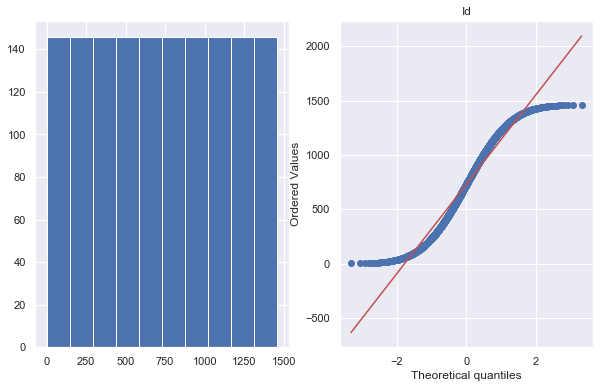

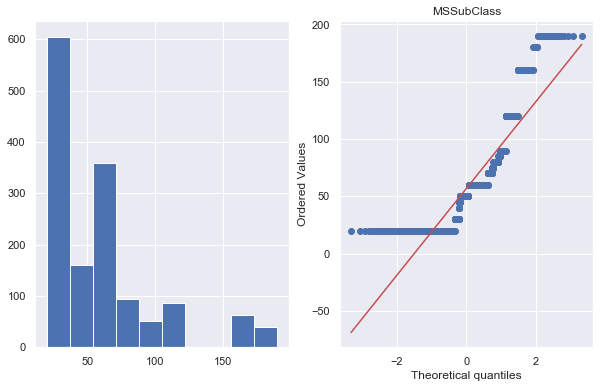

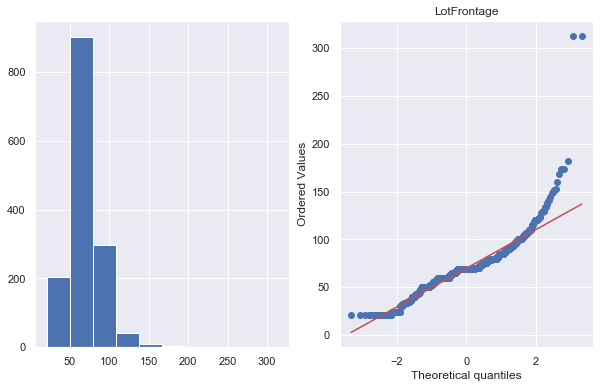

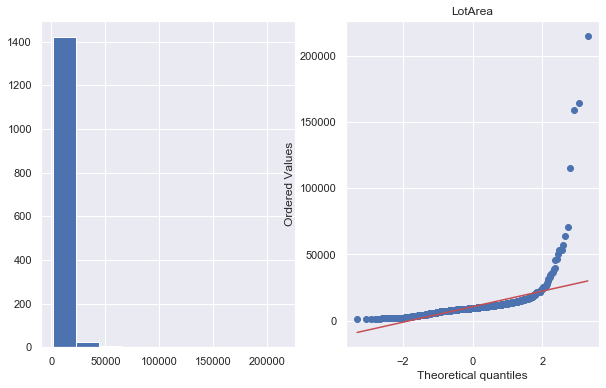

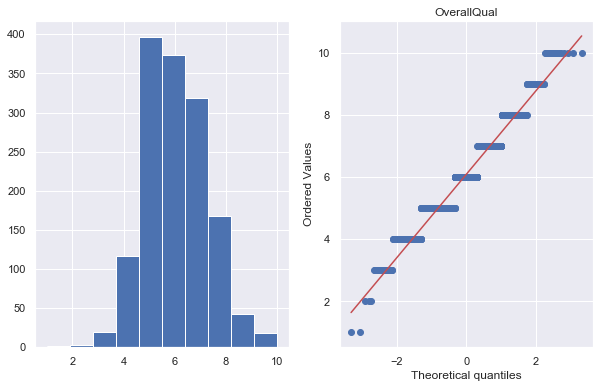

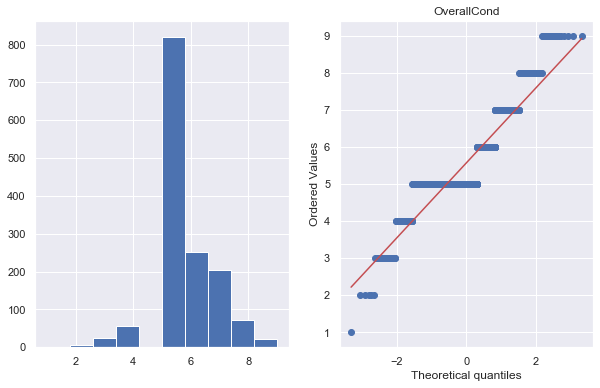

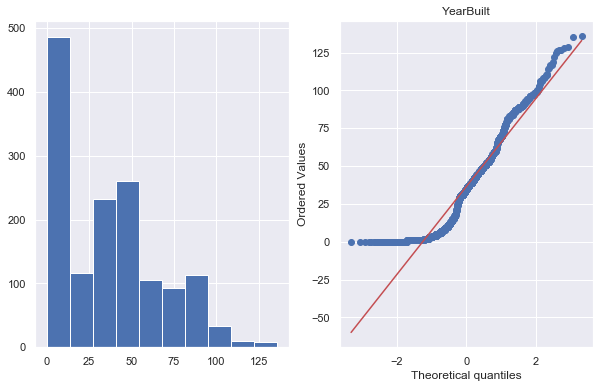

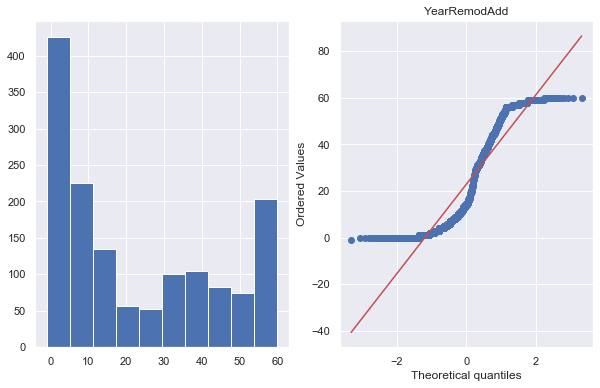

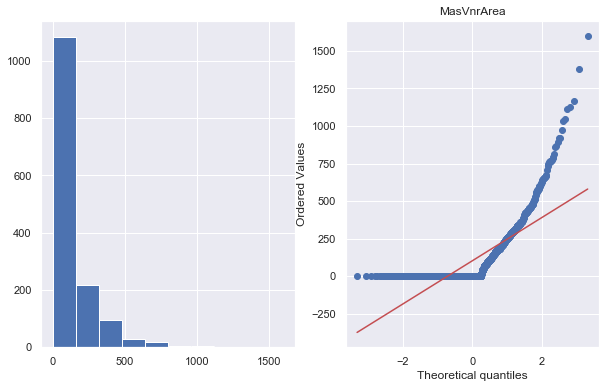

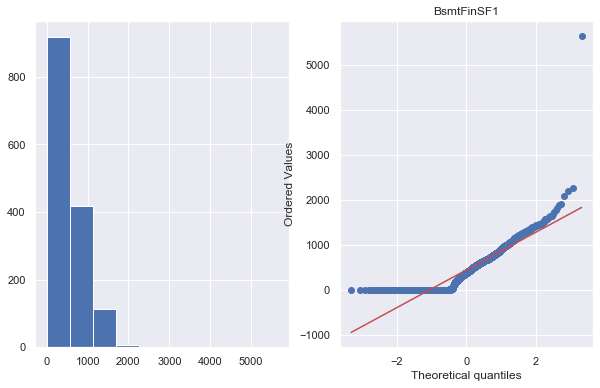

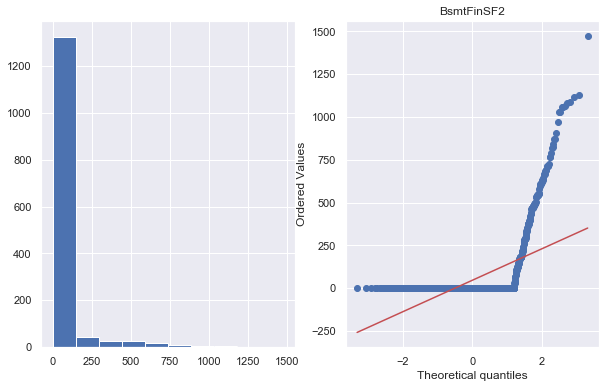

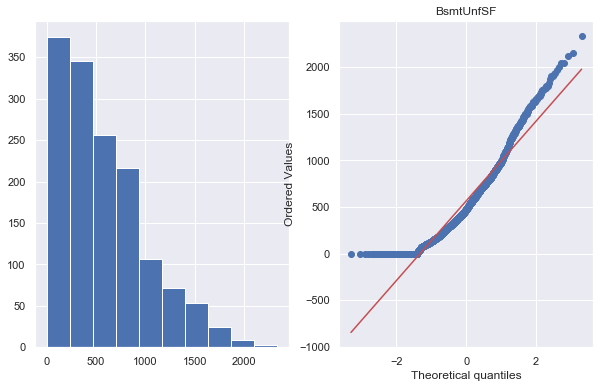

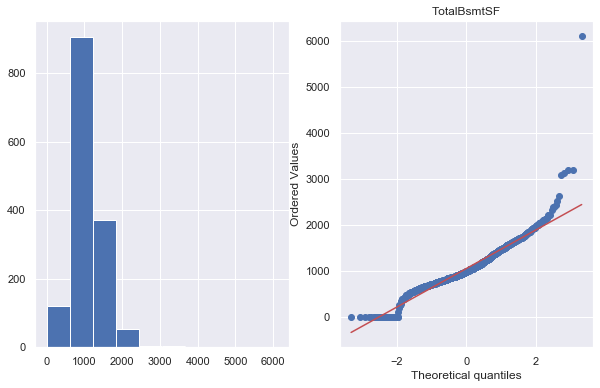

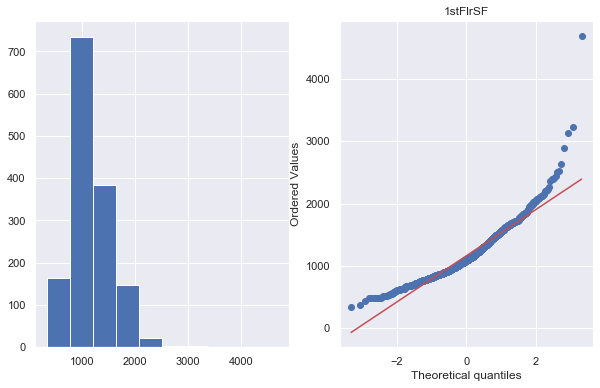

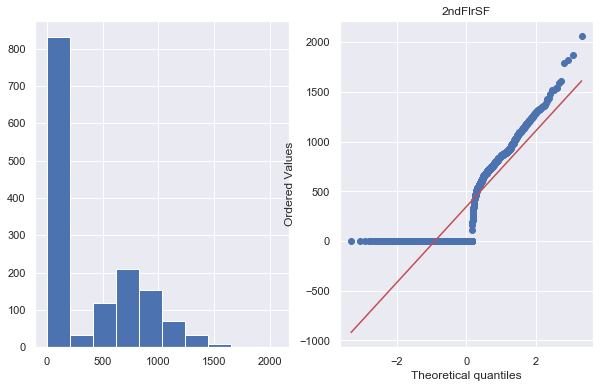

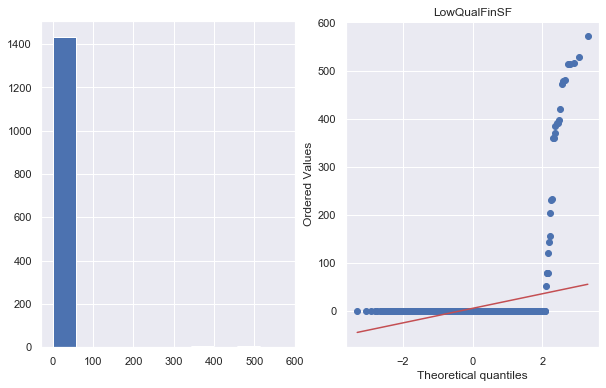

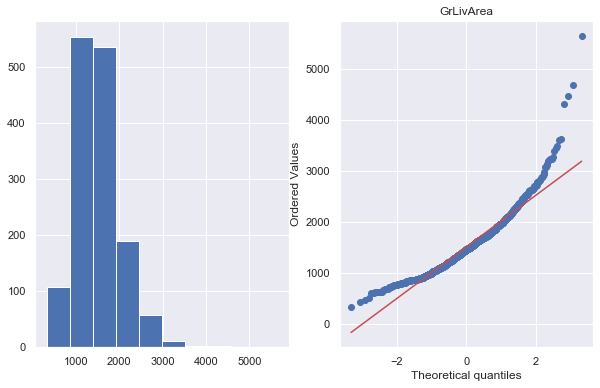

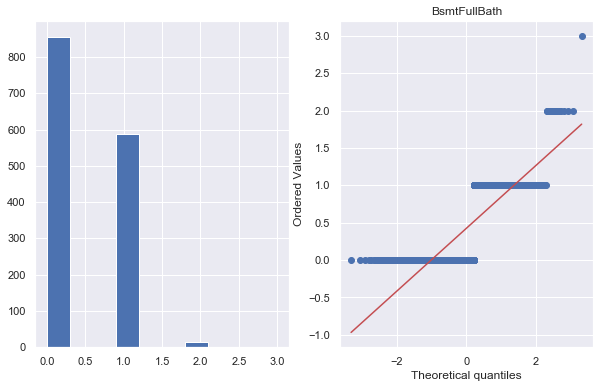

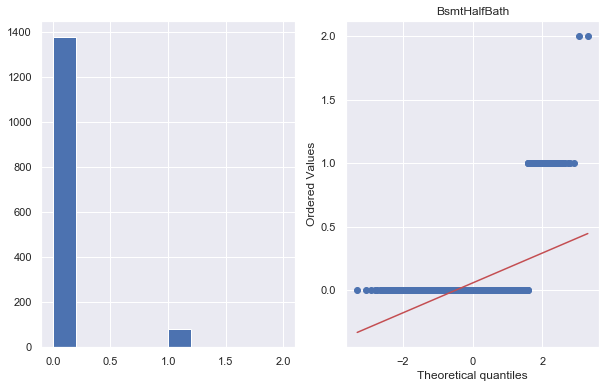

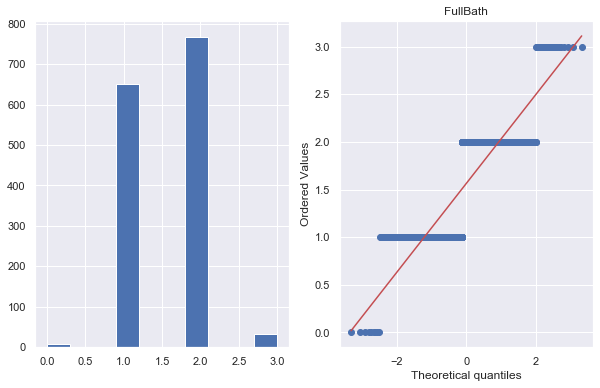

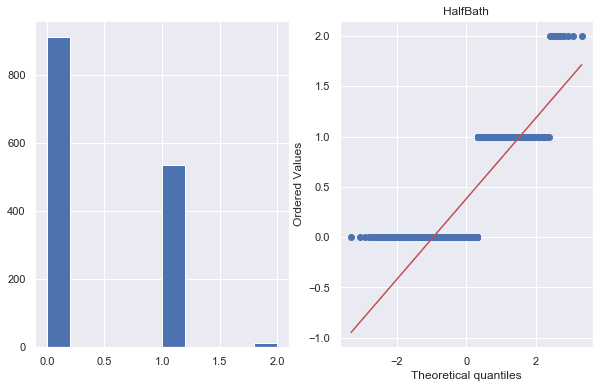

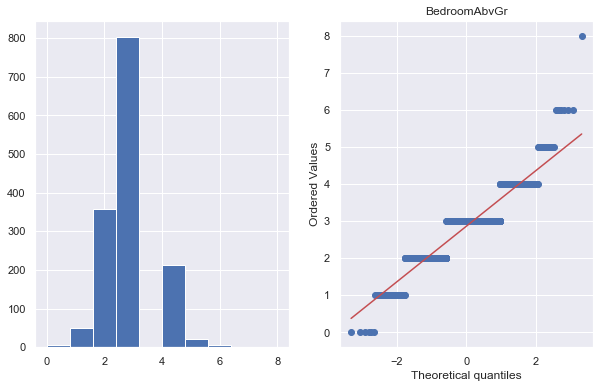

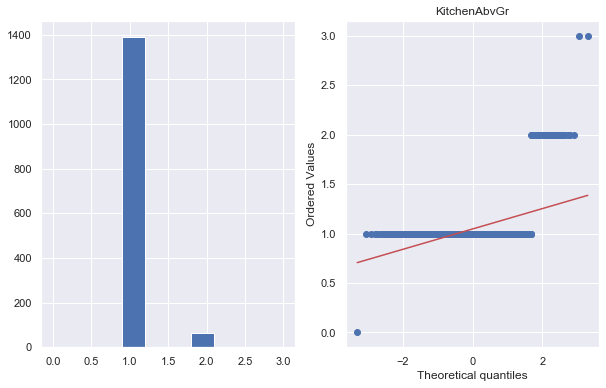

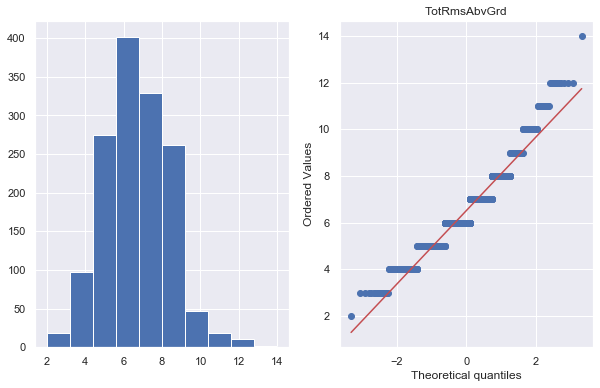

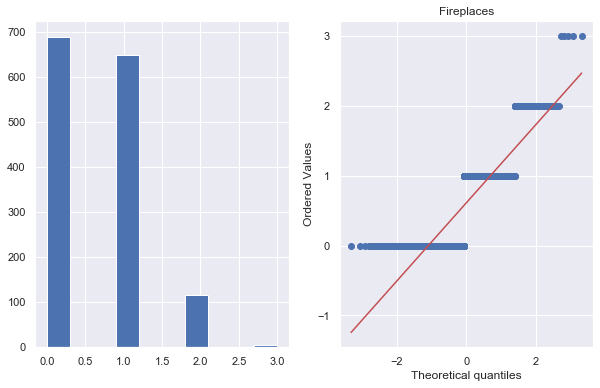

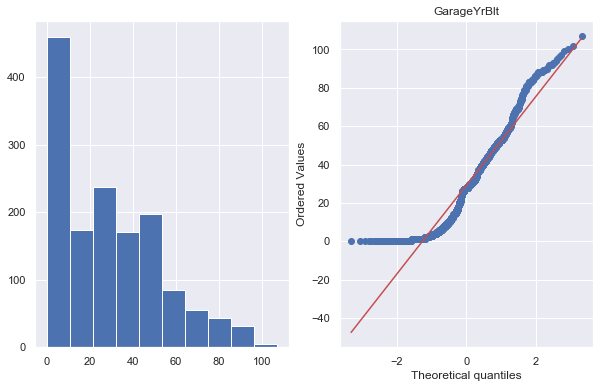

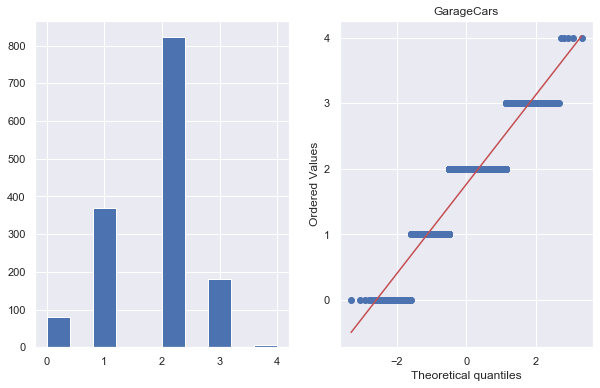

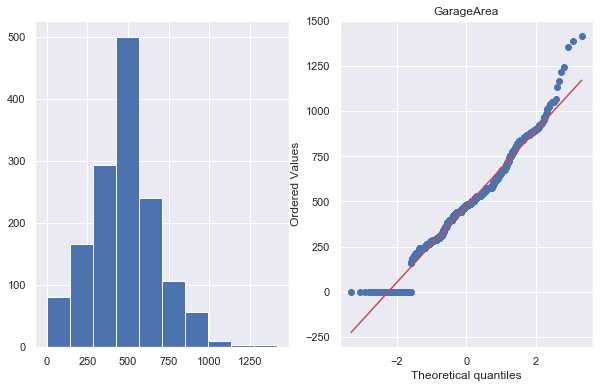

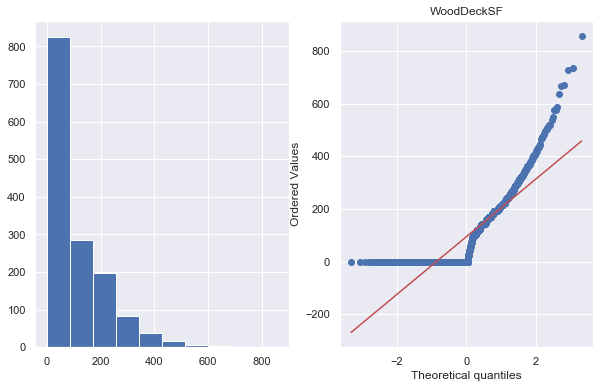

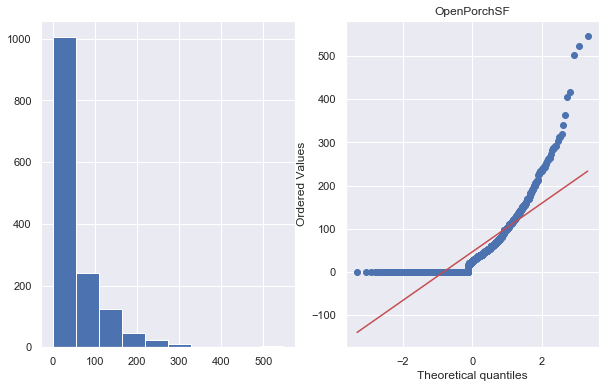

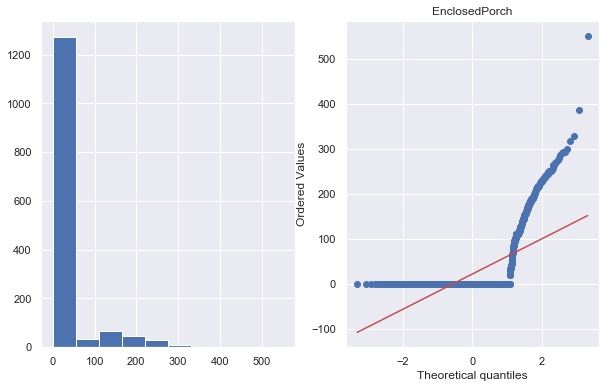

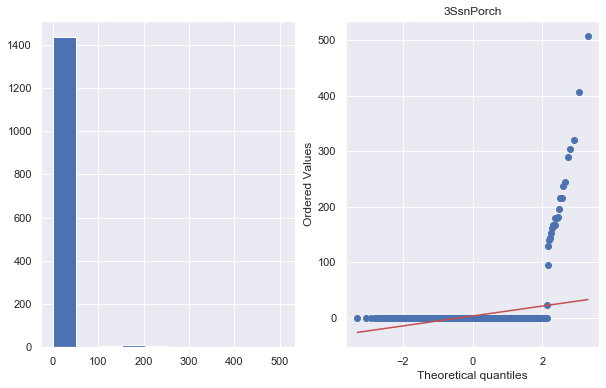

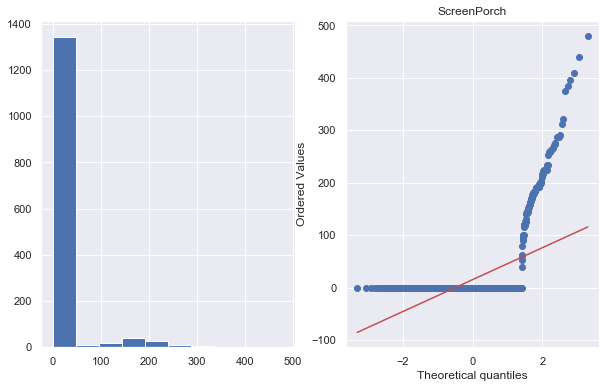

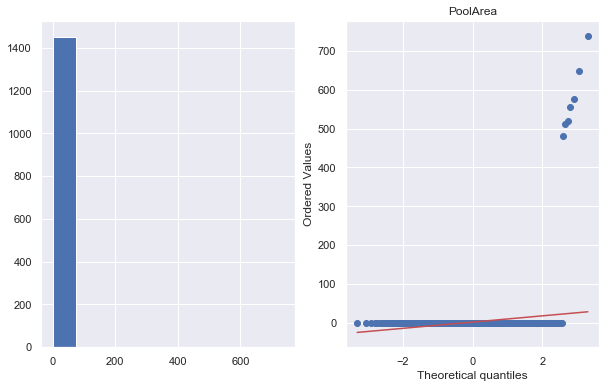

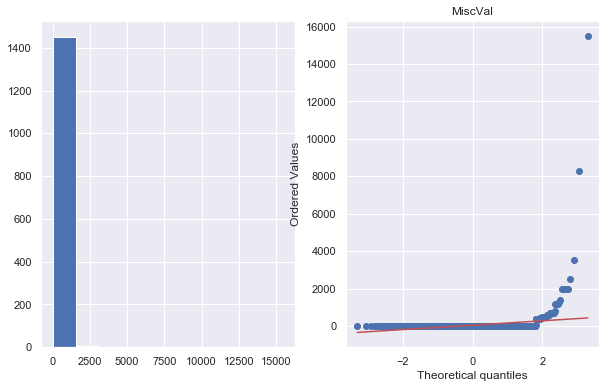

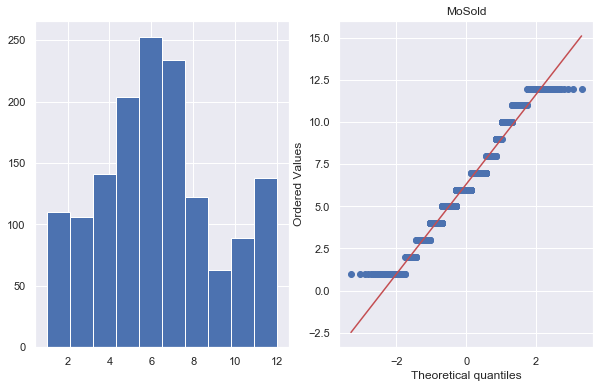

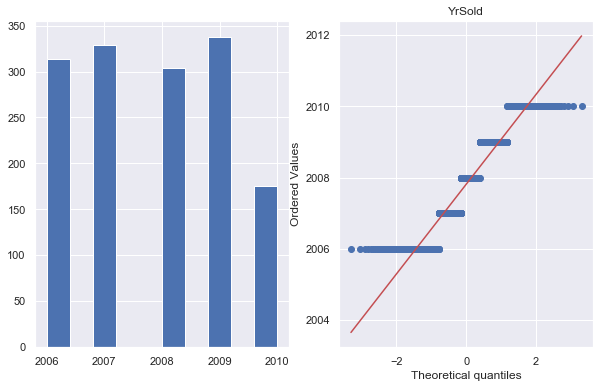

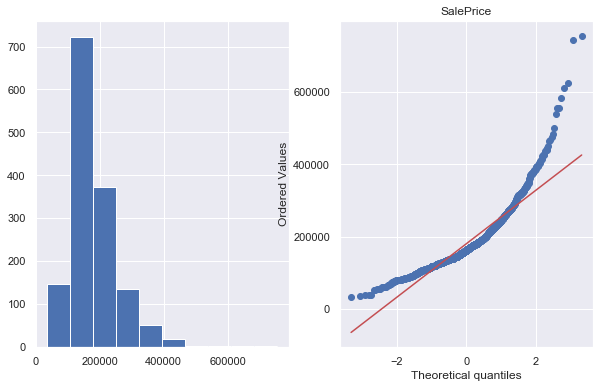

In [48]:
#If we have a straight line passing through most points in a Q-Q then the feature is normally distributed.
numerical_features = [feature for feature in df_train.columns if df_train[feature].dtypes!='O']
plot_data(df_train,numerical_features)

In [49]:
#As we have seen in EDA and from the Q-Q plots above that some of the features are skewed. We need to fix this with Logarithmic Transformation.
skewed_feature = ['LotFrontage','LotArea','GrLivArea']

for feature in skewed_feature:
    df_train[feature] = np.log(df_train[feature])

In [50]:
#similarly for the test dataset.
skewed_feature = ['LotFrontage','LotArea','GrLivArea']

for feature in skewed_feature:
    df_test[feature] = np.log(df_test[feature])

In [51]:
df_train.drop('Id',axis=1,inplace=True)

In [52]:
df_test.drop('Id',axis=1,inplace=True)

## Encoding Categorical Features

In [53]:
categorical_variables = [feature for feature in df_train.columns if df_train[feature].dtypes=='O']

In [54]:
main_df=df_train.copy()

In [55]:
final_df = pd.concat([main_df,df_test],axis=0)

In [56]:
#Let's create a function to encode the categorical features.
def onehot_cols(cols): #The function takes a list of categorcial features/columns.
    df_final=final_df
    i=0
    
    for fields in cols:
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
    df_final=pd.concat([final_df,df_final],axis=1)
    return df_final

In [57]:
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [58]:
final_df = onehot_cols(categorical_variables)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [59]:
final_df.shape

(2919, 237)

In [60]:
#Remove duplicated features.
final_df = final_df.loc[:,~final_df.columns.duplicated()] 

In [61]:
final_df.shape

(2919, 177)

In [62]:
final_df.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0          60     4.174387  9.041922            7            5          5   
1          20     4.382027  9.169518            6            8         31   
2          60     4.219508  9.328123            7            5          7   
3          70     4.094345  9.164296            7            5         91   
4          60     4.430817  9.565214            8            5          8   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0             5       196.0       706.0         0.0      150.0        856.0   
1            31         0.0       978.0         0.0      284.0       1262.0   
2             6       162.0       486.0         0.0      434.0        920.0   
3            36         0.0       216.0         0.0      540.0        756.0   
4             8       350.0       655.0         0.0      490.0       1145.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0   7.444249           1.0           0.0   
1      1262         0             0   7.140453           0.0           1.0   
2       920       866             0   7.487734           1.0           0.0   
3       961       756             0   7.448334           1.0           0.0   
4      1145      1053             0   7.695303           1.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0          5.0         2.0       548.0           0           61   
1         31.0         2.0       460.0         298            0   
2          7.0         2.0       608.0           0           42   
3          8.0         3.0       642.0           0           35   
4          8.0         3.0       836.0         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  FV  RH  RL  RM  Pave  IR2  IR3  Reg  HLS  Low  Lvl  NoSeWa  \
0   208500.0   0   0   1   0     1    0    0    1    0    0    1       0   
1   181500.0   0   0   1   0     1    0    0    1    0    0    1       0   
2   223500.0   0   0   1   0     1    0    0    0    0    0    1       0   
3   140000.0   0   0   1   0     1    0    0    0    0    0    1       0   
4   250000.0   0   0   1   0     1    0    0    0    0    0    1       0   

   CulDSac  FR2  FR3  Inside  Mod  Sev  Blueste  BrDale  BrkSide  ClearCr  \
0        0    0    0       1    0    0        0       0        0        0   
1        0    1    0       0    0    0        0       0        0        0   
2        0    0    0       1    0    0        0       0        0        0   
3        0    0    0       0    0    0        0       0        0        0   
4        0    1    0       0    0    0        0       0        0        0   

   CollgCr  Crawfor  Edwards  Gilbert  IDOTRR  MeadowV  Mitchel  NAmes  \
0        1        0        0        0       0        0        0      0   
1        0        0        0        0       0        0        0      0   
2        1        0        0        0       0        0        0      0   
3        0        1        

In [63]:
#Sepearating our final train and test datasets.
df_Train = final_df.iloc[:1460,:]
df_Test = final_df.iloc[1460:,:]

In [64]:
df_Train

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0             60     4.174387  9.041922            7            5          5   
1             20     4.382027  9.169518            6            8         31   
2             60     4.219508  9.328123            7            5          7   
3             70     4.094345  9.164296            7            5         91   
4             60     4.430817  9.565214            8            5          8   
...          ...          ...       ...          ...          ...        ...   
1455          60     4.127134  8.976768            6            5          8   
1456          20     4.442651  9.486076            6            6         32   
1457          70     4.189655  9.109636            7            9         69   
1458          20     4.219508  9.181632            5            6         60   
1459          20     4.317488  9.204020            5            6         43   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0                5       196.0       706.0         0.0      150.0   
1               31         0.0       978.0         0.0      284.0   
2                6       162.0       486.0         0.0      434.0   
3               36         0.0       216.0         0.0      540.0   
4                8       350.0       655.0         0.0      490.0   
...            ...         ...         ...         ...        ...   
1455             7         0.0         0.0         0.0      953.0   
1456            22       119.0       790.0       163.0      589.0   
1457             4         0.0       275.0         0.0      877.0   
1458            14         0.0        49.0      1029.0        0.0   
1459            43         0.0       830.0       290.0      136.0   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0           856.0       856       854             0   7.444249           1.0   
1          1262.0      1262         0             0   7.140453           0.0   
2           920.0       920       866             0   7.487734           1.0   
3           756.0       961       756             0   7.448334           1.0   
4          1145.0      1145      1053             0   7.695303           1.0   
...           ...       ...       ...           ...        ...           ...   
1455        953.0       953       694             0   7.406711           0.0   
1456       1542.0      2073         0             0   7.636752           1.0   
1457       1152.0      1188      1152             0   7.757906           0.0   
1458       1078.0      1078         0             0   6.982863           1.0   
1459       1256.0      1256         0             0   7.135687           1.0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0              0.0         2         1             3             1   
1              1.0         2         0             3             1   
2              0.0         2         1             3             1   
3              0.0         1         0             3             1   
4              0.0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455           0.0         2         1             3             1   
1456           0.0         2         0             3             1   
1457           0.0         2         0             4             1   
1458           0.0         1         0             2             1   
1459           0.0         1         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                8           0          5.0         2.0       548.0   
1                6           1         31.0         2.0       460.0   
2                6           1          7.0         2.0       608.0   
3                7           1          8.0         3.0       642.0   
4                9           1          8.0         3.0    

In [65]:
df_Test

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0             20     4.382027  9.360655            5            6         49   
1             20     4.394449  9.565704            6            6         52   
2             60     4.304065  9.534595            5            5         13   
3             60     4.356709  9.208138            6            6         12   
4            120     3.761200  8.518193            8            5         18   
...          ...          ...       ...          ...          ...        ...   
1454         160     3.044522  7.568379            4            7         36   
1455         160     3.044522  7.546446            4            5         36   
1456          20     5.075174  9.903488            5            7         46   
1457          85     4.127134  9.253496            5            5         14   
1458          60     4.304065  9.172327            7            5         13   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0               49         0.0       468.0       144.0      270.0   
1               52       108.0       923.0         0.0      406.0   
2               12         0.0       791.0         0.0      137.0   
3               12        20.0       602.0         0.0      324.0   
4               18         0.0       263.0         0.0     1017.0   
...            ...         ...         ...         ...        ...   
1454            36         0.0         0.0         0.0      546.0   
1455            36         0.0       252.0         0.0      294.0   
1456            10         0.0      1224.0         0.0        0.0   
1457            14         0.0       337.0         0.0      575.0   
1458            12        94.0       758.0         0.0      238.0   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0           882.0       896         0             0   6.797940           0.0   
1          1329.0      1329         0             0   7.192182           0.0   
2           928.0       928       701             0   7.395722           0.0   
3           926.0       926       678             0   7.380256           0.0   
4          1280.0      1280         0             0   7.154615           0.0   
...           ...       ...       ...           ...        ...           ...   
1454        546.0       546       546             0   6.995766           0.0   
1455        546.0       546       546             0   6.995766           0.0   
1456       1224.0      1224         0             0   7.109879           1.0   
1457        912.0       970         0             0   6.877296           0.0   
1458        996.0       996      1004             0   7.600902           0.0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0              0.0         1         0             2             1   
1              0.0         1         1             3             1   
2              0.0         2         1             3             1   
3              0.0         2         1             3             1   
4              0.0         2         0             2             1   
...            ...       ...       ...           ...           ...   
1454           0.0         1         1             3             1   
1455           0.0         1         1             3             1   
1456           0.0         1         0             4             1   
1457           1.0         1         0             3             1   
1458           0.0         2         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                5           0         49.0         1.0       730.0   
1                6           0         52.0         1.0       312.0   
2                6           1         13.0         2.0       482.0   
3                7           1         12.0         2.0       470.0   
4                5           0         18.0         2.0    

In [66]:
df_Test.drop('SalePrice',axis=1,inplace=True)

## Modelling

In [67]:
X = df_Train.drop('SalePrice',axis=1)
Y = df_Train['SalePrice']

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

### Modelling using XgBoost Regressor

In [69]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
y_pred

array([209226.52 , 154509.66 , 101715.234, 227925.2  ,  90306.25 ,
       108163.55 , 244905.05 , 132025.33 , 396363.6  , 170576.33 ,
       187129.3  , 129689.39 , 223966.89 , 124349.16 , 128335.4  ,
       140442.44 , 224528.78 , 124365.84 , 135254.55 , 181874.06 ,
       123019.18 , 142626.06 , 115632.4  , 157720.4  , 190446.86 ,
       178025.5  , 182006.95 ,  73450.88 , 342496.25 , 125163.016,
       120169.42 , 195178.52 , 139083.38 , 284325.88 , 379019.72 ,
       175221.05 , 301142.72 , 121960.28 , 229713.23 , 295488.56 ,
       232364.7  , 107351.19 , 184018.53 , 300646.2  , 286669.38 ,
       159080.81 , 127023.23 , 132133.88 , 177390.48 ,  75265.16 ,
       402999.5  , 148485.08 , 166952.9  ,  92590.09 , 246788.72 ,
       109410.555, 135552.95 , 259737.83 , 134455.78 , 104369.55 ,
       138525.5  , 138214.97 , 136439.5  , 175460.22 , 217750.12 ,
       152375.66 , 134672.4  , 201374.11 , 134452.6  , 180084.95 ,
       178460.81 , 124341.43 ,  85534.97 , 245524.22 ,  94853.

In [70]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
score = r2_score(y_test,y_pred)
score

0.831401673169247

In [71]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 33832.12375560655


### Hyperparameter optimization

In [72]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster = ['gbtree','gblinear']
base_score = [0.25,0.5,0.75,1]
learning_rate = [0.05,0.1,0.15,0.20]
min_child_weight = [1,2,3,4]

# Define the grid of hyperparameters to search

hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [73]:
#random_cv.fit(X_train,y_train)

In [74]:
#random_cv.best_estimator_

In [75]:
xgb = XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [76]:
xgb.fit(X_train,y_train)

[20:03:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[20:03:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, monotone_constraints='()',
       n_estimators=900, n_jobs=1, nthread=1, num_parallel_tree=1,
       objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1,
       tree_method='exact', validate_parameters=1, verbosity=None)

In [77]:
y_pred = xgb.predict(df_Test)
y_pred

array([113847.19, 171390.23, 193325.11, ..., 185558.23, 119717.16,
       228499.22], dtype=float32)